# Biodiversity in U.S. National Parks

## North American Birds of Prey

### Data has been cleaned in `wrangling.ipynb`

In [314]:
# Importing the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns
import numpy as np

## Loading in .csv files

### `sw_birds.csv`

In [315]:
birds_df = pd.read_csv('csv_files/sw_birds.csv')
birds_df.rename(columns={'Unnamed: 0': 'prev_index'}, inplace=True)
print(f"Shape of DF: {birds_df.shape}\n")
birds_df.head()

Shape of DF: (6747, 9)



,prev_index,park_code,park_name,family,scientific_name,common_names,conservation_status,protected,raptor
0,42081,GRCA,Grand Canyon National Park,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk
1,42082,GRCA,Grand Canyon National Park,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk
2,42083,GRCA,Grand Canyon National Park,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk
3,42084,GRCA,Grand Canyon National Park,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle
4,42085,GRCA,Grand Canyon National Park,Accipitridae,Buteo albonotatus,Zone Tailed Hawk,Least Concern,False,Hawk


In [316]:
# Fill the 'NaN' values with 'Not Raptor'
birds_df['raptor'].fillna('Not Raptor', inplace=True)

### `sw_data.csv`

In [317]:
parks_df = pd.read_csv('csv_files/sw_data.csv')
print(f"Shape of DF: {parks_df.shape}\n")
parks_df.head()

Shape of DF: (24, 6)



,park_code,park_name,state,latitude,longitude,hectares
0,GRCA,Grand Canyon,AZ,36.06,-112.14,492665.95
1,PEFO,Petrified Forest,AZ,35.07,-109.78,37851.50
2,SAGU,Saguaro,AZ,32.25,-110.50,37004.49
3,CHIS,Channel Islands,CA,34.01,-119.42,100993.84
4,DEVA,Death Valley,CA,36.24,-116.82,1918580.71


### `sw_extras.csv`

Extra columns may/may not need

In [318]:
extras_df = pd.read_csv('csv_files/sw_extras.csv')
extras_df.rename(columns={'Unnamed: 0': 'prev_index'}, inplace=True)
extras_df.head()

,prev_index,scientific_name,common_names,occurrence,nativeness,abundance,seasonality
0,42081,Accipiter cooperii,Cooper's Hawk,Present,Native,Common,Breeder
1,42082,Accipiter gentilis,Northern Goshawk,Present,Native,Common,Breeder
2,42083,Accipiter striatus,Sharp-Shinned Hawk,Present,Native,Common,Breeder
3,42084,Aquila chrysaetos,Golden Eagle,Present,Native,Uncommon,Breeder
4,42085,Buteo albonotatus,Zone-Tailed Hawk,Present,Native,Common,Breeder


## - `birds_df` and `extras_df` have the same index $\in$ `prev_index`

----
&nbsp;
## DataFrame merges



----
#### 1. DataFrame `sw_birds_df` from;
- `birds_df`
- `parks_df`

Aim to retain as much data as possible, using an inner merge.

In [319]:
# inner merge to retain all data
sw_birds_df = pd.merge(birds_df, parks_df, on='park_code', how='inner')

print(f"\nwith shape: {sw_birds_df.shape}")


with shape: (6747, 14)


Delete newly created column `park_name_x` and change `park_name_y` to `park_name`

In [320]:
sw_birds_df.drop(columns=['park_name_x'], axis=1, inplace=True)
sw_birds_df.rename(columns={'park_name_y': 'park_name'}, inplace=True)
sw_birds_df.head(10)

,prev_index,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares
0,42081,GRCA,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
1,42082,GRCA,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
2,42083,GRCA,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
3,42084,GRCA,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle,Grand Canyon,AZ,36.06,-112.14,492665.95
4,42085,GRCA,Accipitridae,Buteo albonotatus,Zone Tailed Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
5,42086,GRCA,Accipitridae,Buteo jamaicensis,Red Tailed Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
6,42087,GRCA,Accipitridae,Buteo lagopus,Rough Legged Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
7,42088,GRCA,Accipitridae,Buteo lineatus,Red Shouldered Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
8,42089,GRCA,Accipitridae,Buteo platypterus,Broad Winged Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
9,42090,GRCA,Accipitridae,Buteo regalis,Ferruginous Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95


----
#### 2. DataFrame `sw_birds_all_df` from;
- `sw_birds_df`
- `extras_df`

Aim to retain as much data as possible, using an inner merge.
- replace columns in `extras_df`
- Will ultimately retain `scientific_name` and `common_names` from `birds_df`

In [321]:
extras_df = extras_df.rename(columns={'scientific_name': 'sci_loose', 'common_names': 'com_loose'})

In [322]:
# inner merge to retain all data
sw_birds_all_df = pd.merge(sw_birds_df, extras_df, on='prev_index', how='inner')

print(f"\nwith shape: {sw_birds_all_df.shape}")


with shape: (6747, 19)


----
Delete columns

- `prev_index` in `sw_birds_df`
- `prev_index`, `sci_loose` & `com_loose` from `sw_birds_all_df`

DataFrames are merged in correct position with new indexes created

In [323]:
sw_birds_df.drop(columns=['prev_index'], axis=1, inplace=True)
sw_birds_all_df.drop(columns=['prev_index', 'sci_loose', 'com_loose'], axis=1, inplace=True)

In [324]:
print(f"\nsw_birds_df shape: {sw_birds_df.shape}")
sw_birds_df.head()


sw_birds_df shape: (6747, 12)


,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares
0,GRCA,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
1,GRCA,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
2,GRCA,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95
3,GRCA,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle,Grand Canyon,AZ,36.06,-112.14,492665.95
4,GRCA,Accipitridae,Buteo albonotatus,Zone Tailed Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95


We have retained `sw_birds_all_df` which is the meta DataFrame for (possible) use at a later date

In [325]:
meta_df_cols = sw_birds_all_df.columns.tolist()
print(f"\nsw_birds_all_df shape: {sw_birds_all_df.shape}\n")
print(f"With columns; \n{meta_df_cols}")


sw_birds_all_df shape: (6747, 16)

With columns; 
['park_code', 'family', 'scientific_name', 'common_names', 'conservation_status', 'protected', 'raptor', 'park_name', 'state', 'latitude', 'longitude', 'hectares', 'occurrence', 'nativeness', 'abundance', 'seasonality']


----
# Analysis


### `sw_birds_df` inspection



In [326]:
sw_parks_list = sw_birds_df['park_name'].unique().tolist()
print(f"We have {len(sw_parks_list)} parks: \n\n{sw_parks_list}")

We have 24 parks: 

['Grand Canyon', 'Petrified Forest', 'Saguaro', 'Channel Islands', 'Death Valley', 'Joshua Tree', 'Lassen Volcanic', 'Pinnacles', 'Redwood', 'Sequoia & Kings Canyon', 'Yosemite', 'Black Canyon of the Gunnison', 'Great Sand Dunes', 'Mesa Verde', 'Rocky Mountain', 'Great Basin', 'Carlsbad Caverns', 'Big Bend', 'Guadalupe Mountains', 'Arches', 'Bryce Canyon', 'Canyonlands', 'Capitol Reef', 'Zion']


<img src="Images/parks_state_lines.png"/>

[GoogleEarth](https://earth.google.com/web/@35.23163888,-113.62762396,1125.39304439a,3255718.49710107d,30.00077622y,0.00000085h,0t,0r)

In [327]:
states_list = sw_birds_df['state'].unique().tolist()
states_list = sorted(states_list)
print(f"We have {len(states_list)} states: \n\n{states_list}")

We have 7 states: 

['AZ', 'CA', 'CO', 'NM', 'NV', 'TX', 'UT']


Create separate Dataframes for each state $\in$ `states_list`.

We iterate through `states_list` to produce summary statistics of the categorical data

In [328]:
d = {}
for state in states_list:
    d[state] = pd.DataFrame(sw_birds_df[sw_birds_df['state'] == state])

for i in range(0, len(states_list)):
    print(f"\n\n{states_list[i]}:\nShape: {d[states_list[i]].shape}")
    categorical_cols = d[states_list[i]].select_dtypes(include=['object']).columns
    print(f"Summary statistics:\n{d[states_list[i]][categorical_cols].describe().transpose()}")



AZ:
Shape: (872, 12)
Summary statistics:
                    count unique                 top freq
park_code             872      3                GRCA  383
family                872     61         Emberizidae   80
scientific_name       872    463  Accipiter cooperii    3
common_names          872    469       Cooper's Hawk    3
conservation_status   872      6       Least Concern  693
raptor                872     12          Not Raptor  783
park_name             872      3        Grand Canyon  383
state                 872      1                  AZ  872


CA:
Shape: (2461, 12)
Summary statistics:
                    count unique                 top  freq
park_code            2461      8                DEVA   460
family               2461     72           Parulidae   208
scientific_name      2461    677  Accipiter cooperii     8
common_names         2461    676       Cooper's Hawk     8
conservation_status  2461      6       Least Concern  1985
raptor               2461     12     

California has the largest representation in `sw_birds_df`

In [329]:
# We can call DataFrames for each state using below syntax
# For Example, California:
d['CA'].head()

,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares
872,CHIS,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk,Channel Islands,CA,34.01,-119.42,100993.84
873,CHIS,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk,Channel Islands,CA,34.01,-119.42,100993.84
874,CHIS,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk,Channel Islands,CA,34.01,-119.42,100993.84
875,CHIS,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle,Channel Islands,CA,34.01,-119.42,100993.84
876,CHIS,Accipitridae,Buteo jamaicensis,Red Tailed Hawk,Least Concern,False,Hawk,Channel Islands,CA,34.01,-119.42,100993.84


Need to double-check rows where `common_names` is 'None'. These will be removed from the dataset

In [330]:
com_name_none = sw_birds_df[sw_birds_df['common_names'] == 'None']
com_name_none_grouped = com_name_none.groupby('state').size().reset_index(name='count')

for state in states_list:
    state_rows = com_name_none_grouped[com_name_none_grouped['state'] == state]
    if len(state_rows) > 0:
        print(f"State: {state}, None Count: {state_rows['count'].values[0]}")

State: AZ, None Count: 2
State: CA, None Count: 3
State: CO, None Count: 2
State: NV, None Count: 1


In [331]:
com_name_none.head(10)

,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares
249,GRCA,Parulidae,Leiothlypis celata orestera,None,Least Concern,False,Not Raptor,Grand Canyon,AZ,36.06,-112.14,492665.95
844,SAGU,Picidae,Colaptes auratus cafer,None,Least Concern,False,Not Raptor,Saguaro,AZ,32.25,-110.50,37004.49
1230,DEVA,Paridae,Parus inornatus griseus,None,Least Concern,False,Not Raptor,Death Valley,CA,36.24,-116.82,1918580.71
1764,JOTR,Scolopacidae,Tringa semipalmata,None,Least Concern,False,Not Raptor,Joshua Tree,CA,33.79,-115.90,319598.75
2401,REDW,No Data,Erolia ptilochemis,None,Least Concern,False,Not Raptor,Redwood,CA,41.30,-124.00,45532.03
3613,GRSA,Emberizidae,Junco hyemalis aikeni,None,Least Concern,False,Not Raptor,Great Sand Dunes,CO,37.73,-105.51,17395.02
4103,ROMO,Emberizidae,Junco hyemalis mearnsi,None,Least Concern,False,Not Raptor,Rocky Mountain,CO,40.40,-105.58,107576.87
4256,GRBA,Fringillidae,Carduelis pinus vagans,None,Least Concern,False,Not Raptor,Great Basin,NV,38.98,-114.30,31233.67


In [332]:
sw_birds_df = sw_birds_df[sw_birds_df['common_names'] != 'None'].reset_index()
sw_birds_df.drop(columns=['index'], axis=1, inplace=True)
count = sw_birds_df[sw_birds_df['common_names'] == 'None']
count

,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares


-----

# Visualising `conservation_status`

#### Defining DataFrame `sw_birds_df_two`

In [333]:
conservation_dummies = pd.get_dummies(sw_birds_df['conservation_status'])\
    .rename(columns=lambda x: x.lower().replace(' ', '_')).astype(bool)
sw_birds_df = pd.concat([sw_birds_df, conservation_dummies], axis=1)

In [334]:
parks_pro_counts_two = sw_birds_df.groupby(['state', 'park_name'])\
                                        [['least_concern', 'endangered', 'in_recovery', 'species_of_concern', 'threatened', 'under_review']].sum()\
                                        .reset_index()

percent = round((parks_pro_counts_two.endangered
                + parks_pro_counts_two.in_recovery
                + parks_pro_counts_two.species_of_concern
                + parks_pro_counts_two.threatened
                + parks_pro_counts_two.under_review) / (parks_pro_counts_two.endangered
                                                        + parks_pro_counts_two.in_recovery
                                                        + parks_pro_counts_two.least_concern
                                                        + parks_pro_counts_two.species_of_concern
                                                        + parks_pro_counts_two.threatened
                                                        + parks_pro_counts_two.under_review)
                                                        * 100, 2)
parks_pro_counts_two['percent_protected'] = percent

parks_pro_counts_two.head()

,state,park_name,least_concern,endangered,in_recovery,species_of_concern,threatened,under_review,percent_protected
0,AZ,Grand Canyon,310,3,3,63,2,1,18.85
1,AZ,Petrified Forest,190,0,2,51,1,0,22.13
2,AZ,Saguaro,191,0,0,51,2,0,21.72
3,CA,Channel Islands,289,1,2,60,2,3,19.05
4,CA,Death Valley,386,1,2,64,2,4,15.90


#### Organise `conservation_status` so,
- 'Endangered' > 'In Recovery' > 'Threatened' > 'Under Review' > 'Species of Concern' per [IUCN](https://en.wikipedia.org/wiki/IUCN_Red_List)

Definitions
- `Endangered`: Seriously at risk of extinction
- `In Recovery`: Formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range
- `Threatened`: Vulnerable to endangerment in the near future
- `Under Review`: Population decreasing. Could be reclassified `Threatened`
- `Species of Concern`: Declining or appear to be in need of conservation

Create {key:value} dictionary of colours and `conservation_status` labels

In [335]:
cons_status_list = ['Endangered', 'In Recovery', 'Threatened', 'Under Review', 'Species of Concern', 'Least Concern']
cons_status_list = list(reversed(cons_status_list))
cons_colours = ['#bd0026','#f03b20','#fd8d3c','#fecc5c','#ffffb2', '#74c476']
cons_colours = list(reversed(cons_colours))

In [336]:
cons_colour = {}
for status in cons_status_list:
    for colour in cons_colours:
        cons_colour[status] = colour
        cons_colours.remove(colour)
        break

print(f"The resulting dictionary is: \n{cons_colour}")

The resulting dictionary is: 
{'Least Concern': '#74c476', 'Species of Concern': '#ffffb2', 'Under Review': '#fecc5c', 'Threatened': '#fd8d3c', 'In Recovery': '#f03b20', 'Endangered': '#bd0026'}


In [337]:
# Defining another shorter version
cons_status_list_two = ['Endangered', 'In Recovery', 'Threatened']
cons_colours_two = ['#bd0026','#f03b20','#fd8d3c']
cons_colour_two = {}
for status in cons_status_list_two:
    for colour in cons_colours_two:
        cons_colour_two[status] = colour
        cons_colours_two.remove(colour)
        break
print(f"The resulting dictionary is: \n{cons_colour_two}")

The resulting dictionary is: 
{'Endangered': '#bd0026', 'In Recovery': '#f03b20', 'Threatened': '#fd8d3c'}


----

### Visualisation

We plot an iteration of the `park_pro_counts_two` by `state` for those states with more than two National Parks

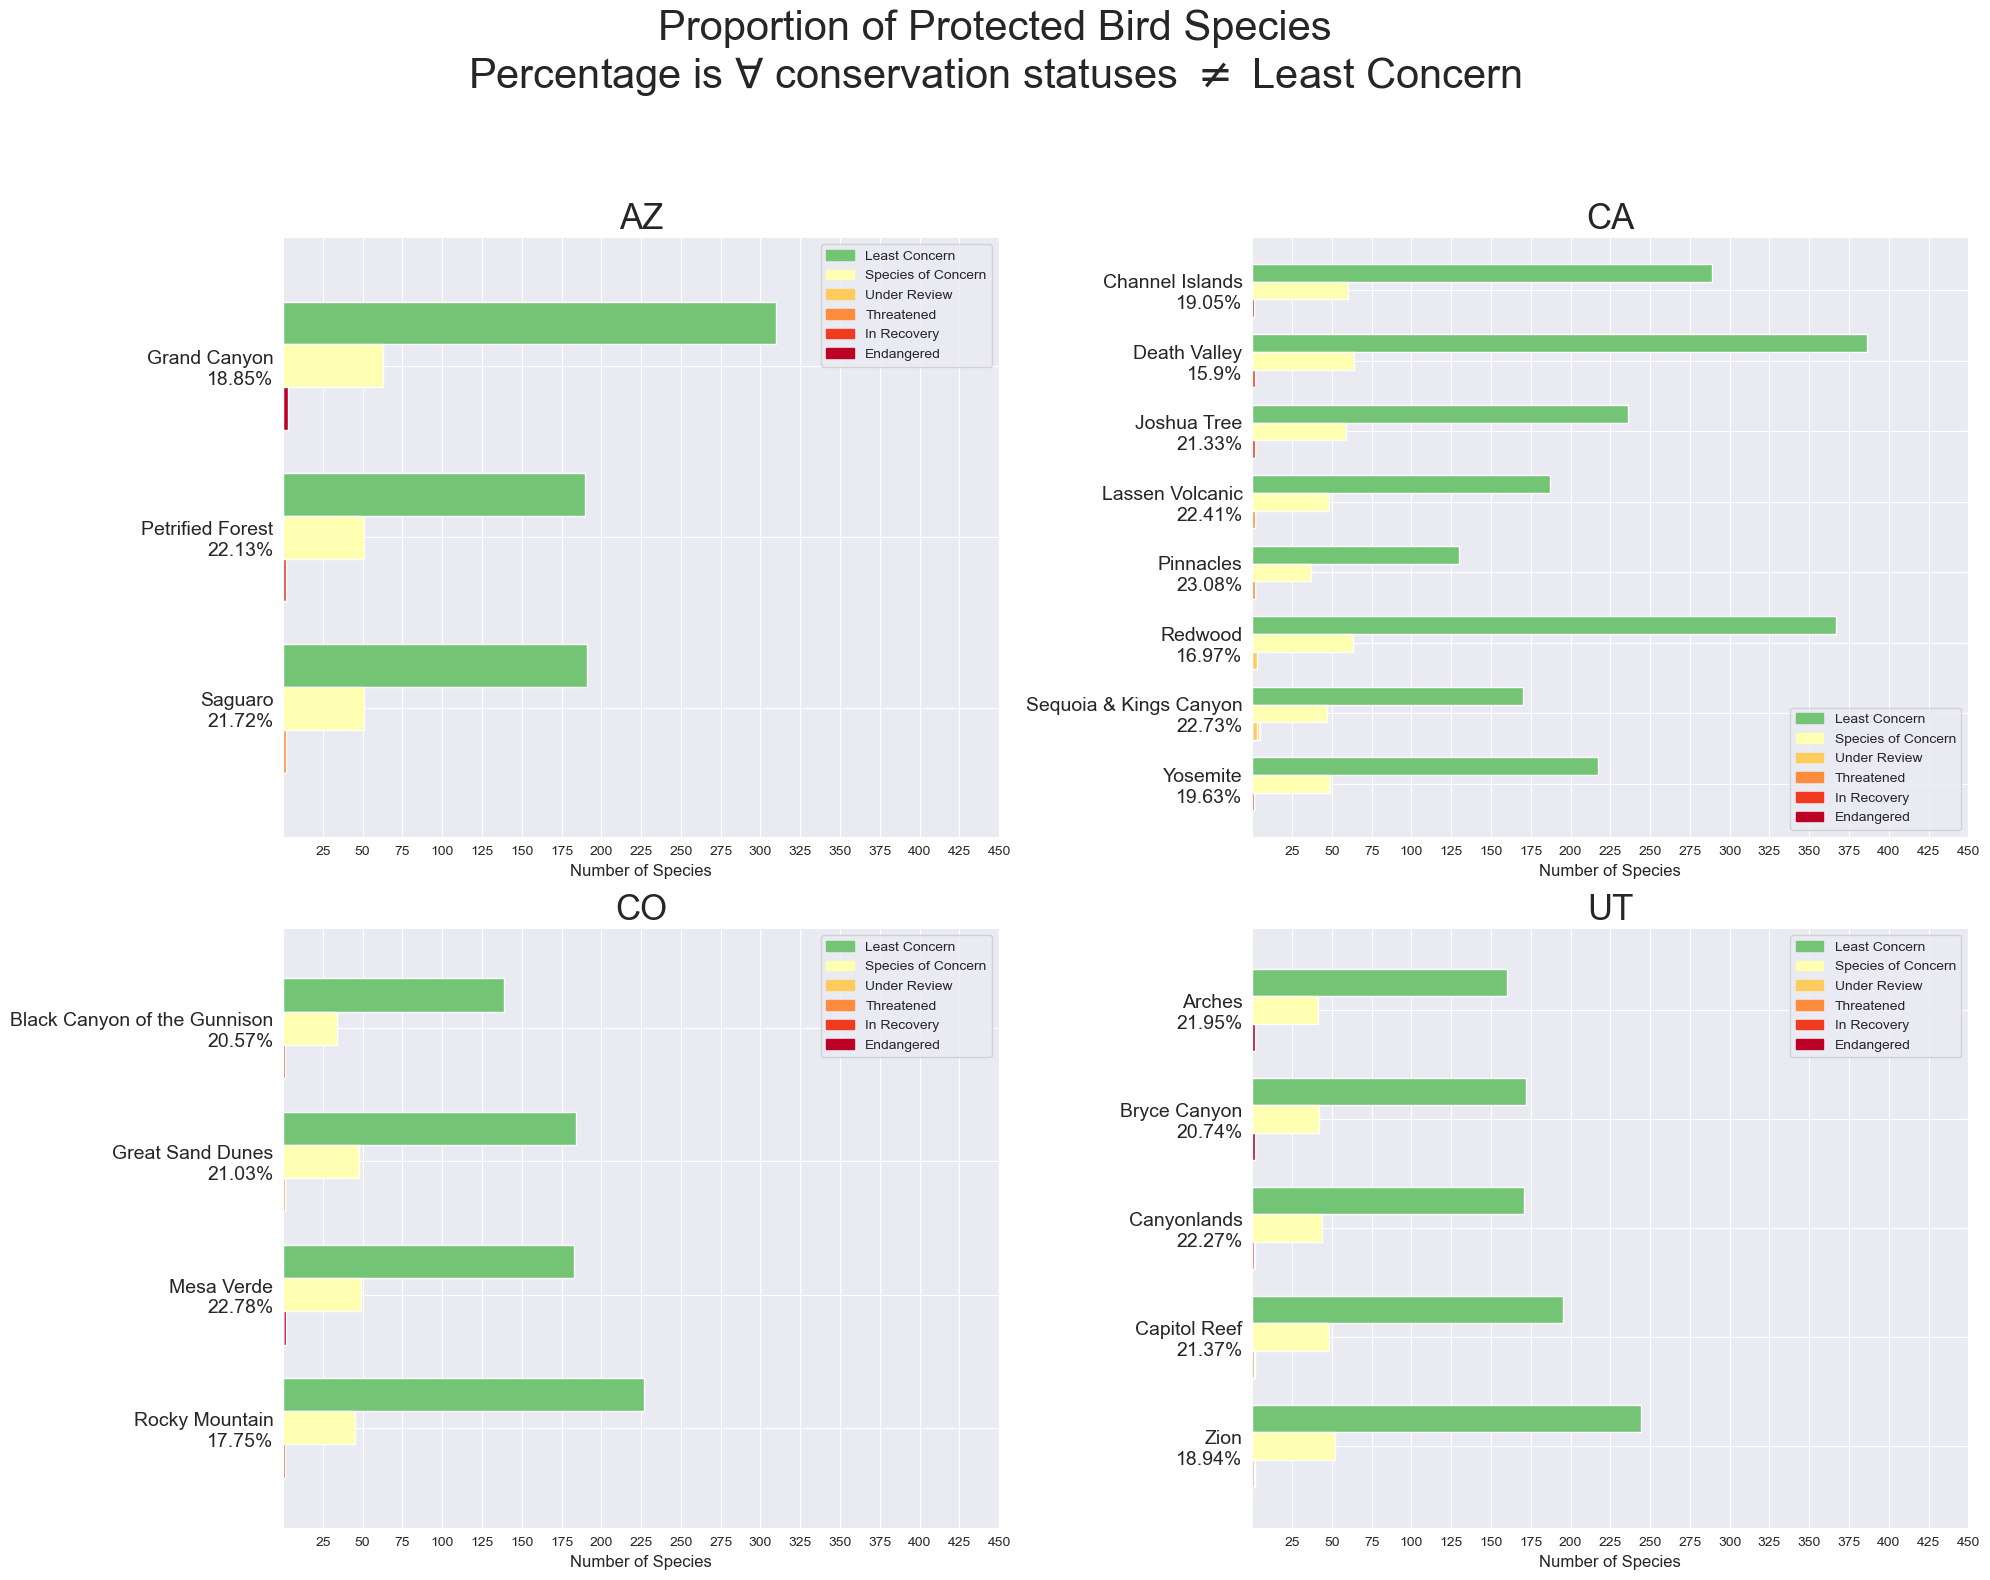

In [338]:
handles = [mpatches.Patch(color=colour, label=label) for label, colour in cons_colour.items()]
states_list_short = ['AZ', 'CA', 'CO', 'UT']

cons_colours = ['#bd0026','#f03b20','#fd8d3c','#fecc5c','#ffffb2', '#74c476']

plt.figure(figsize=(20,15))
plt.suptitle('Proportion of Protected Bird Species\nPercentage is $\\forall$ conservation statuses $\\neq$ Least Concern', fontsize=30, y=1.05)

for i, state in enumerate(states_list_short):
    data = pd.DataFrame(parks_pro_counts_two[parks_pro_counts_two['state'] == state])
    age_protected = data['percent_protected'].values
    ind = np.arange(len(data))
    width = 0.25
    ax = plt.subplot(2,2,(i+1))
    plt.title(state, fontsize=25)
    ax.barh(ind, data.least_concern, width, color='#74c476')
    ax.barh(ind + width, data.species_of_concern, width, color='#ffffb2')

    ax.barh(ind + 2 * width, data.endangered, width, color='#bd0026')
    height = data.endangered
    ax.barh(ind + 2 * width + height, data.in_recovery, width, color='#f03b20')
    height += data.in_recovery
    ax.barh(ind + 2 * width + height, data.threatened, width, color='#fd8d3c')
    height += data.threatened
    ax.barh(ind + 2 * width + height, data.under_review, width, color='#fecc5c')

    ax.set(yticks=ind + width, yticklabels=[f'{park}\n{age}%'
                for park, age in zip(data.park_name, age_protected)], ylim=[2*width - 1, len(data)])
    plt.yticks(rotation=0, fontsize=14)
    plt.xticks(np.arange(25,475,25))
    plt.xlabel('Number of Species', fontsize=12)
    plt.legend(handles=handles, fontsize=10)
    plt.gca().invert_yaxis() # y-axis runs from top to bottom
    plt.grid(True)

plt.subplots_adjust(top=0.5)
plt.tight_layout()
plt.show()

#### From above, we can see a very small number of bird species fall into the protected 'at risk' subset that includes;
- Endangered
- In Recovery
- Threatened

Below is a visualisation of these categories

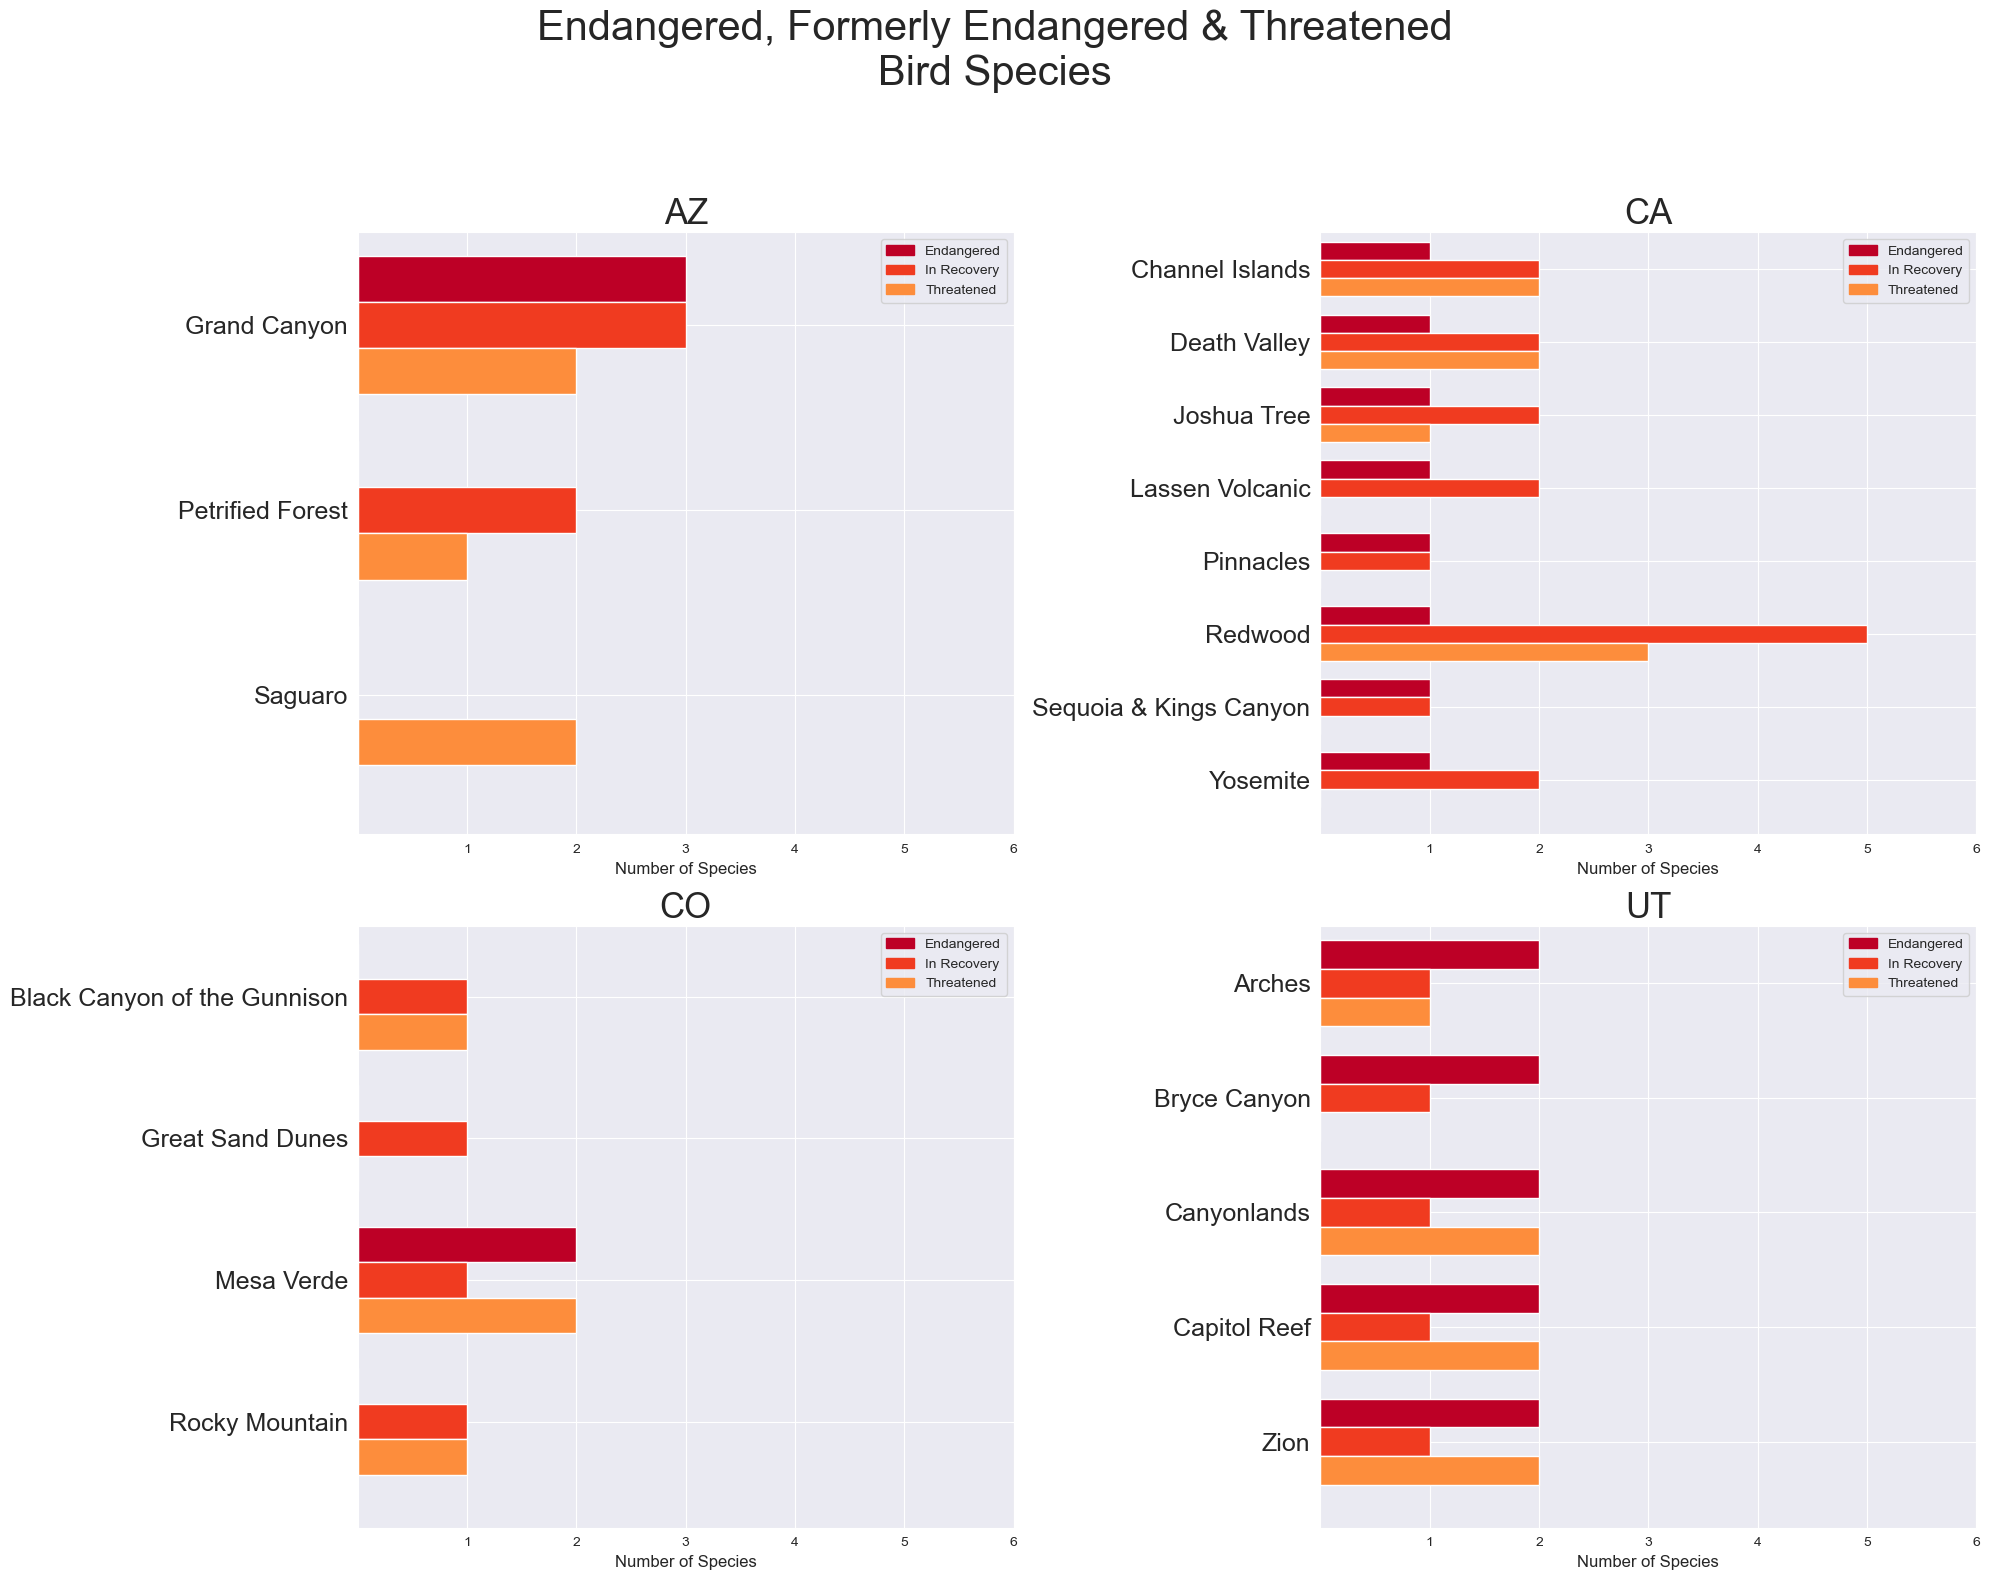

In [339]:
handles_two = [mpatches.Patch(color=colour, label=label) for label, colour in cons_colour_two.items()]

plt.figure(figsize=(20,15))
plt.suptitle('Endangered, Formerly Endangered & Threatened\nBird Species', fontsize=30, y=1.05)

for i, state in enumerate(states_list_short):
    data = pd.DataFrame(parks_pro_counts_two[parks_pro_counts_two['state'] == state])
    age_protected = data['percent_protected'].values
    ind = np.arange(len(data))
    width = 0.25
    ax = plt.subplot(2,2,(i+1))
    plt.title(state, fontsize=25)
    ax.barh(ind, data.endangered, width, color='#bd0026')
    ax.barh(ind + width, data.in_recovery, width, color='#f03b20')
    ax.barh(ind + 2*width, data.threatened, width, color='#fd8d3c')
    ax.set(yticks=ind + width, yticklabels=data.park_name, ylim=[3*width - 1, len(data)])
    plt.yticks(fontsize=18)
    plt.xticks(np.arange(1,7,1))
    plt.xlabel('Number of Species', fontsize=12)
    plt.legend(handles=handles_two, fontsize=10)
    plt.gca().invert_yaxis() # y-axis runs from top to bottom
    plt.grid(True)

plt.subplots_adjust(top=0.5)
plt.tight_layout()
plt.show()

----

----
## Visualising Park Area


'Death Valley National Park' lies partly in CA and partly in NV

In [340]:
park_area_df = sw_birds_df.groupby(['state', 'park_name'])[['hectares', 'park_code']].mean().reset_index()
park_area_df = park_area_df.sort_values(by='hectares', ascending=True)

In [341]:
# Divide the hectares column by 1000
def divide_by_1000(column):
    return round(column / 1000, 3)

park_area_df['hectares'] = park_area_df['hectares'].apply(divide_by_1000)

In [342]:
park_area_df.head()

,state,park_name,hectares
7,CA,Pinnacles,10.767
11,CO,Black Canyon of the Gunnison,13.334
20,UT,Bryce Canyon,14.502
12,CO,Great Sand Dunes,17.395
15,NM,Carlsbad Caverns,18.926


In [343]:
print(states_list)
state_colours = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69']
state_colour = {}
for state in states_list:
    for colour in state_colours:
        state_colour[state] = colour
        state_colours.remove(colour)
        break
print(f"\nThe resulting dictionary is: \n{state_colour}")

['AZ', 'CA', 'CO', 'NM', 'NV', 'TX', 'UT']

The resulting dictionary is: 
{'AZ': '#8dd3c7', 'CA': '#ffffb3', 'CO': '#bebada', 'NM': '#fb8072', 'NV': '#80b1d3', 'TX': '#fdb462', 'UT': '#b3de69'}


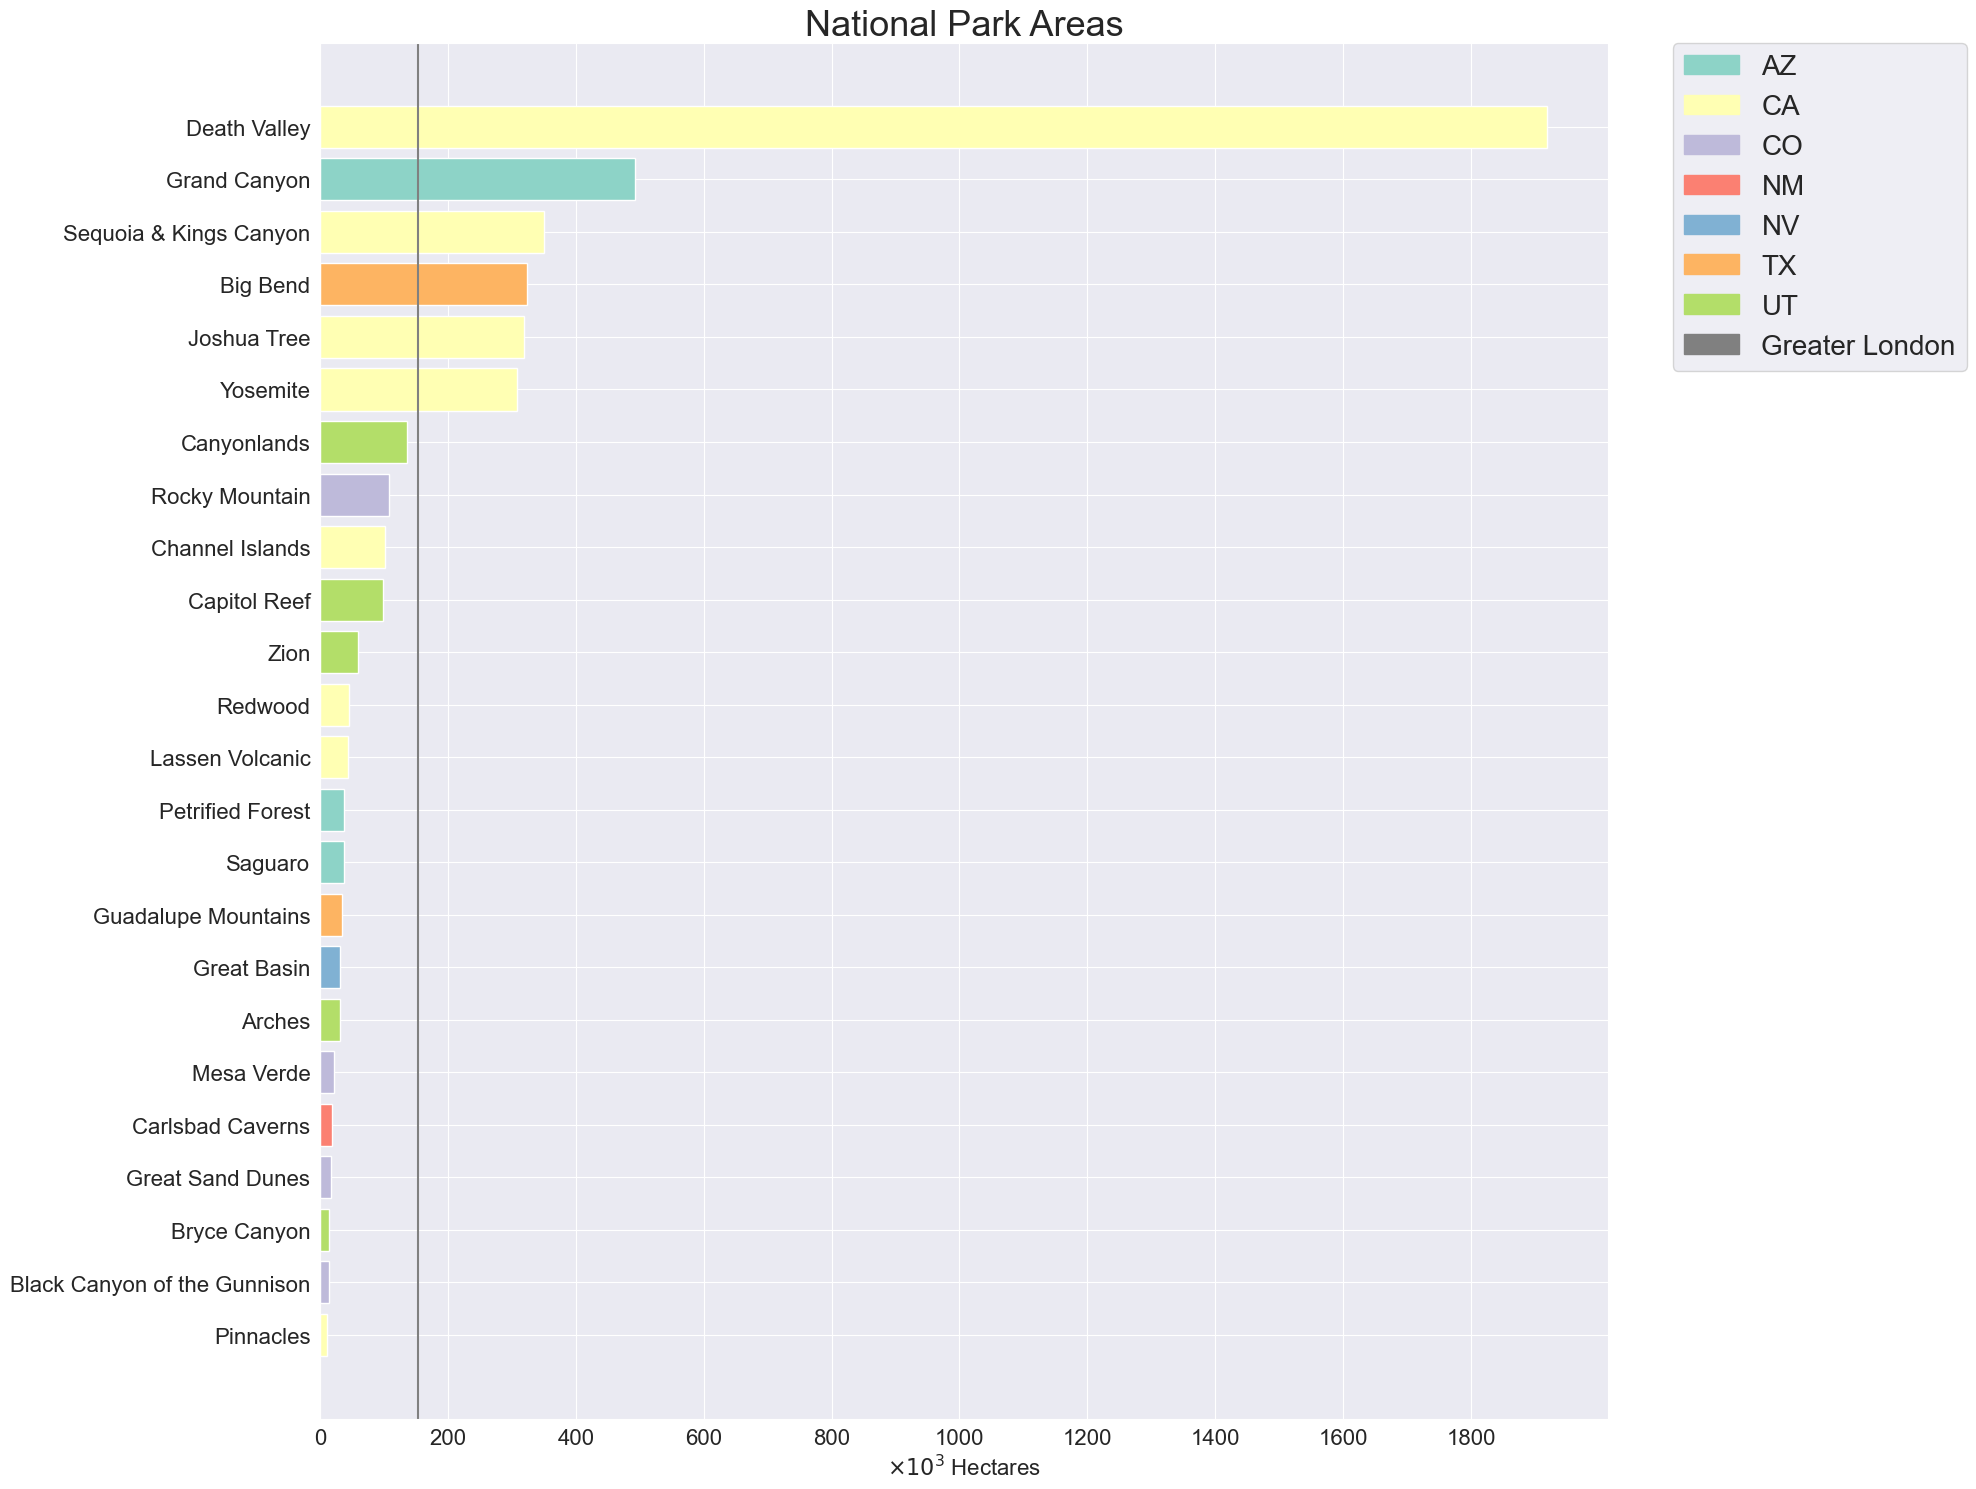

In [344]:
# legend colours
handles_three = [mpatches.Patch(color=colour, label=label) for label, colour in state_colour.items()]
# bar colours with lambda function
colour = park_area_df['state'].apply(lambda x: state_colour[x])

plt.figure(figsize=(20,15))
plt.title('National Park Areas', fontsize=26)
plt.barh(y=park_area_df.park_name, width=park_area_df.hectares, color=colour)
plt.axvline(x=153, color='#808080', label='Greater London')
plt.yticks(rotation=0, fontsize=16)
plt.xticks(np.arange(0,2000,200), fontsize=16)
plt.xlabel(f'$\\times 10^{3}$ Hectares', fontsize=16)
plt.legend(handles=handles_three + [mpatches.Patch(color='#808080', label='Greater London')],
           fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()

## Death Valley (CA & NV) is $\approx 1.9$ million hectares and clearly an outlier.
'Death Valley' is four times the size of 'Grand Canyon National Park'
&nbsp;
## As a comparison, Greater London is $153\times 10^{3}$ hectares

Will plot a zoom of `park_names` $< 150 \times 10^{3}$ hectares

In [345]:
# Removing the outlier 'Death Valley'
park_area_subset = park_area_df[park_area_df['hectares'] < 150]

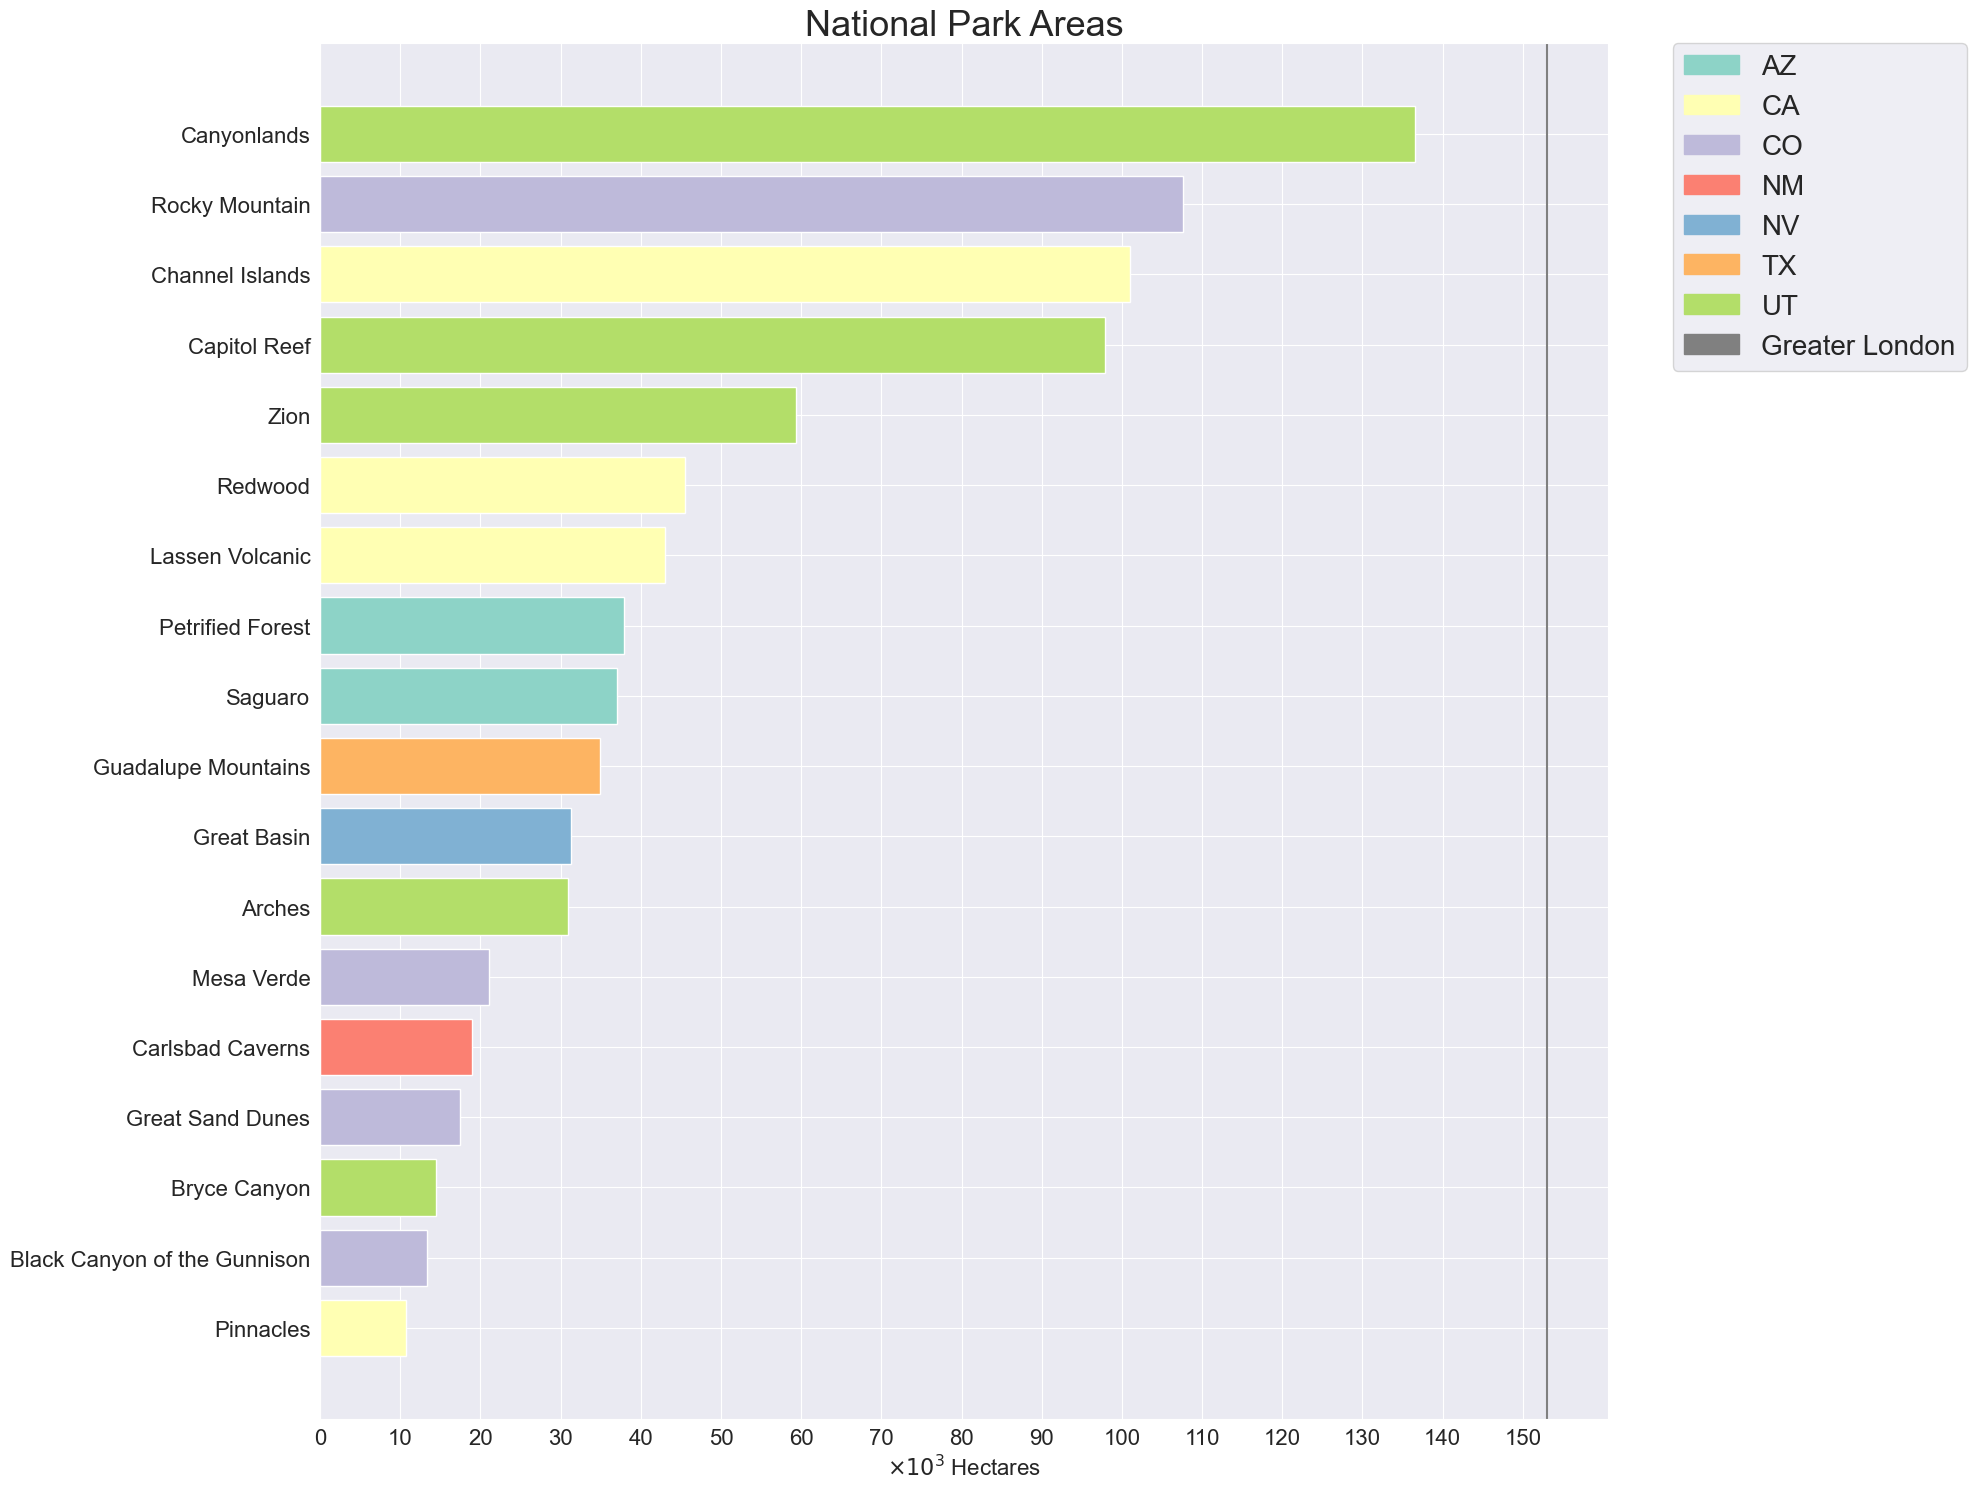

In [346]:
# plotting park areas < 150000 hectares
plt.figure(figsize=(20,15))
plt.title('National Park Areas', fontsize=26)
plt.barh(y=park_area_subset.park_name, width=park_area_subset.hectares, color=colour)
plt.axvline(x=153, color='#808080', label='Greater London')
plt.yticks(rotation=0, fontsize=16)
plt.xticks(np.arange(0,160,10), fontsize=16)
plt.xlabel(f'$\\times 10^{3}$ Hectares', fontsize=16)
plt.legend(handles=handles_three + [mpatches.Patch(color='#808080', label='Greater London')],
           fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()

----

----
# Visualising proportion of raptors

#### Create a new boolean column `is_raptor`
- Fill values 'NaN' with 'Not Raptor'

In [347]:
sw_birds_df['is_raptor'] = sw_birds_df.raptor != 'Not Raptor'

In [348]:
parks_prey_counts = sw_birds_df.groupby(['state', 'park_name', 'is_raptor'])\
                    .common_names.nunique()\
                    .reset_index()\
                    .pivot(columns='is_raptor',
                            index=['state', 'park_name'],
                            values='common_names')\
                            .reset_index()
parks_prey_counts.columns = ['state', 'park_name', 'not_raptor', 'raptor']

percentage2 = round(parks_prey_counts.raptor / (parks_prey_counts.raptor + parks_prey_counts.not_raptor) * 100, 2)
parks_prey_counts['percentage_raptor'] = percentage2

parks_prey_counts.head()

,state,park_name,not_raptor,raptor,percentage_raptor
0,AZ,Grand Canyon,349,33,8.64
1,AZ,Petrified Forest,222,22,9.02
2,AZ,Saguaro,210,34,13.93
3,CA,Channel Islands,335,22,6.16
4,CA,Death Valley,420,39,8.50


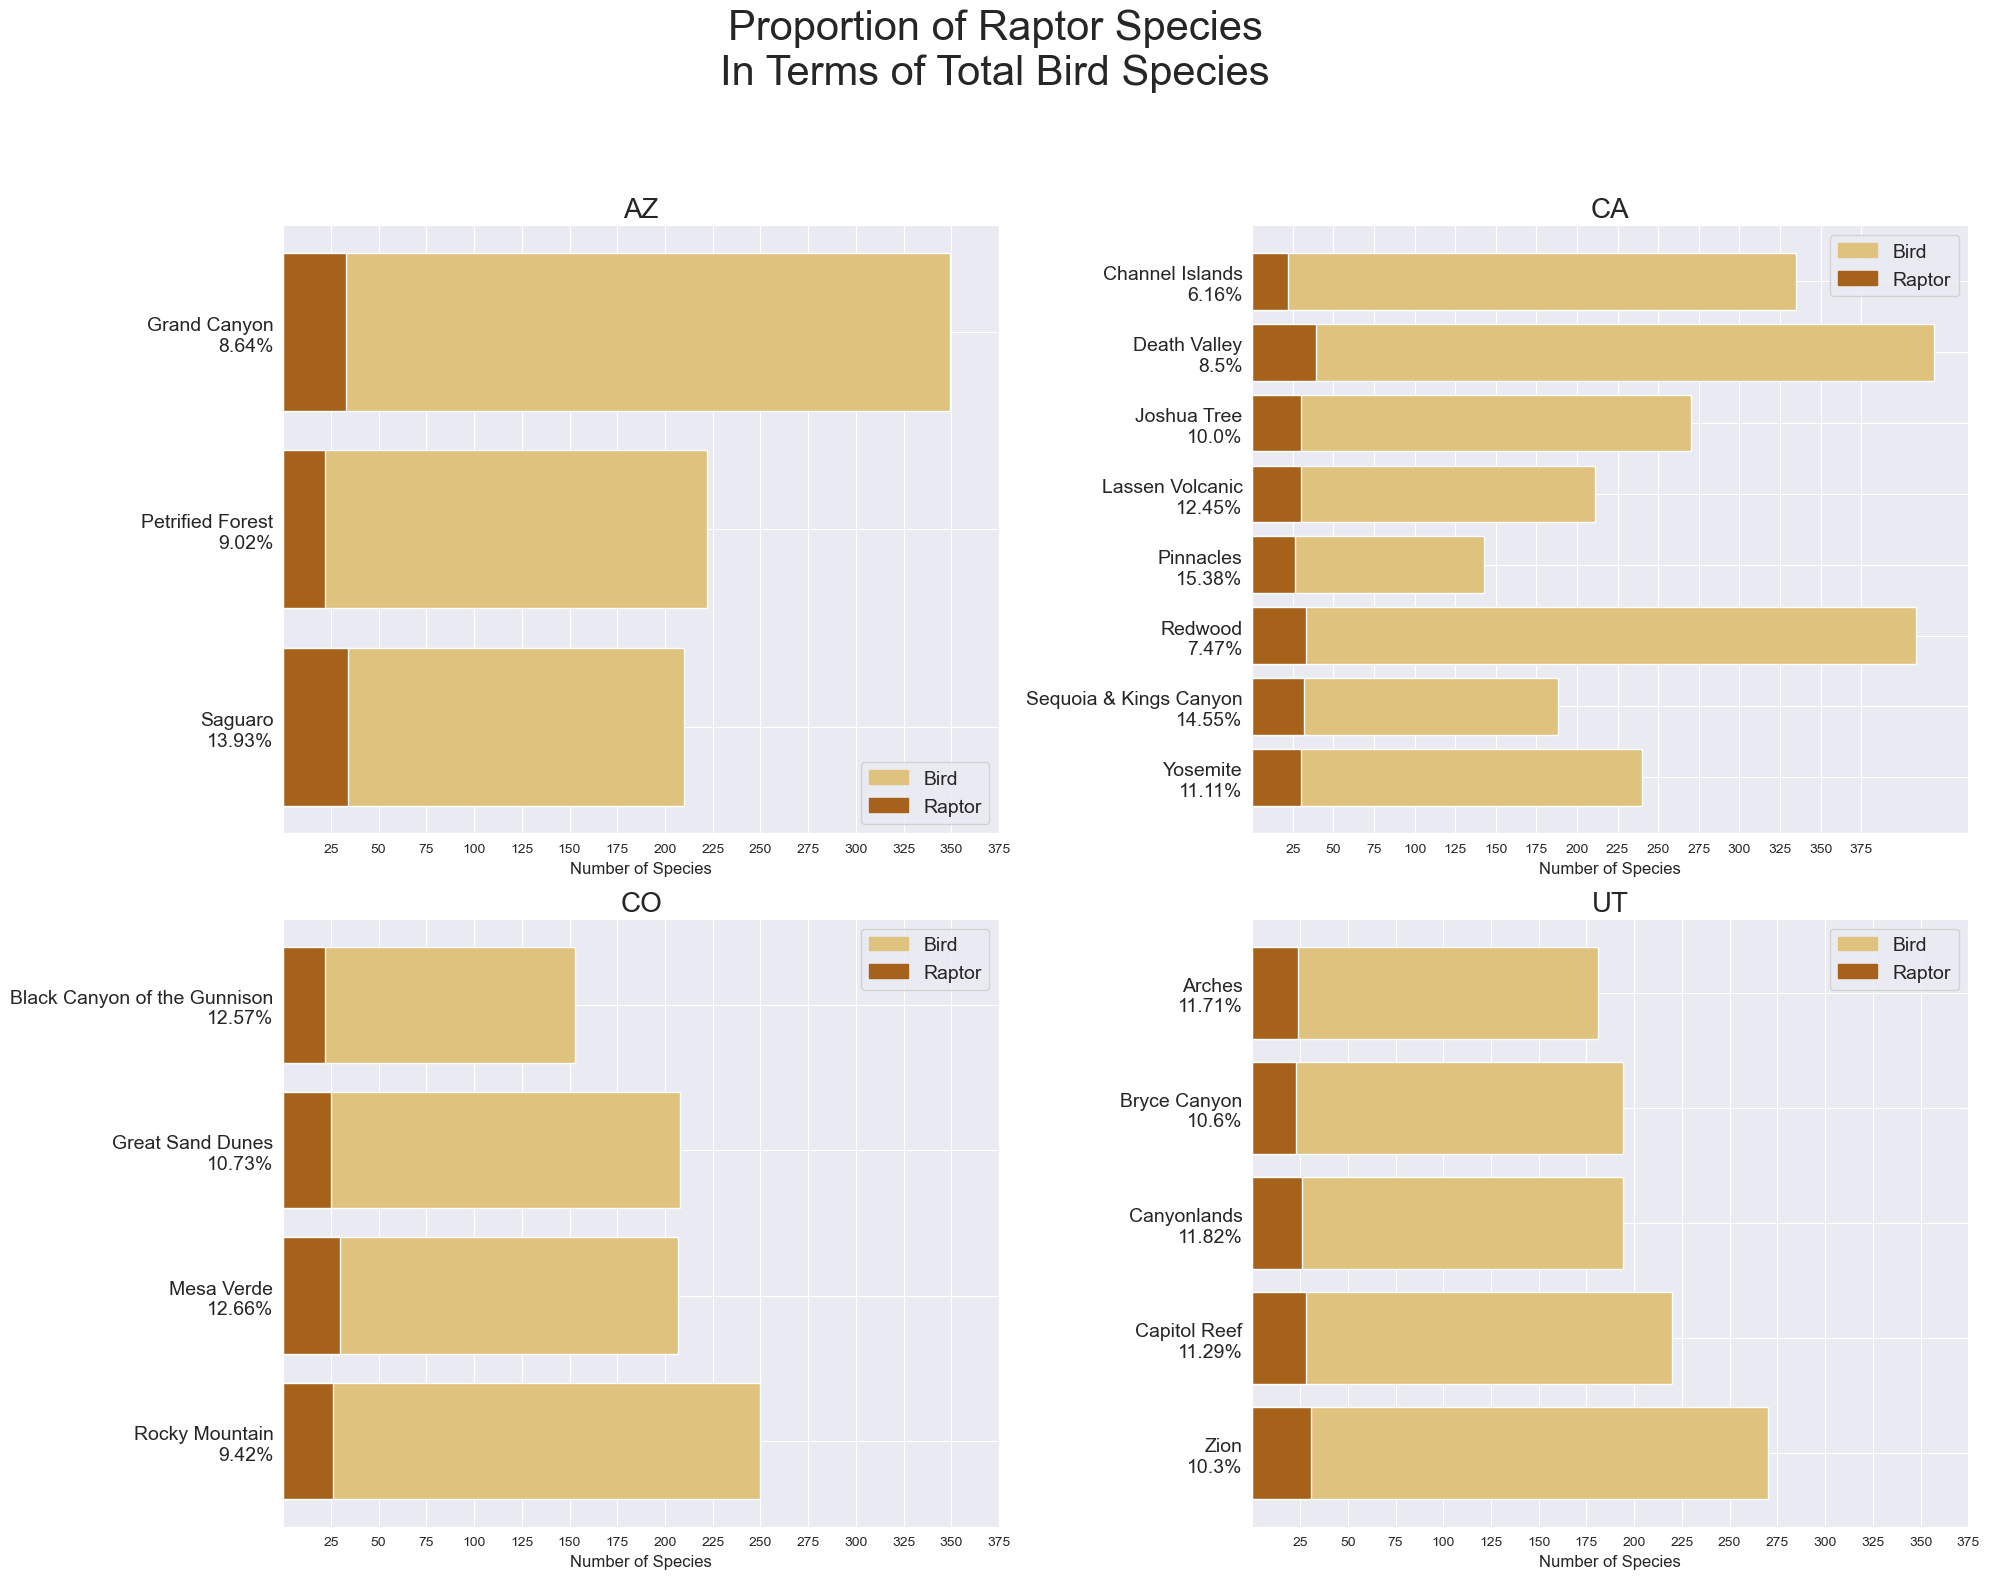

In [351]:
# Plotting only states with more than 2 National Parks.
# Defining a new states_list with above criteria
colours = {'Bird': '#dfc27d', 'Raptor': '#a6611a'}
handles = [mpatches.Patch(color=colour, label=label) for label, colour in colours.items()]

plt.figure(figsize=(20,15))
plt.suptitle('Proportion of Raptor Species\nIn Terms of Total Bird Species', fontsize=30, y=1.05)
for i, state in enumerate(states_list_short):
    data = pd.DataFrame(parks_prey_counts[parks_prey_counts['state'] == state])
    age_protected = data['percentage_raptor'].values
    plt.subplot(2,2,(i+1))
    plt.title(state, fontsize=20)
    plt.barh(y=data.park_name, width=data.not_raptor, color=colours['Bird'])
    plt.barh(y=data.park_name, width=data.raptor, color=colours['Raptor'])
    plt.yticks(np.arange(len(data)),
               [f'{park}\n{age}%'
                for park, age in zip(data.park_name, age_protected)],
               rotation=0, fontsize=14)
    plt.xticks(np.arange(25,400,25))
    plt.xlabel('Number of Species', fontsize=12)
    plt.legend(handles=handles, fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(True)

plt.subplots_adjust(top=0.5)
plt.tight_layout()
plt.show()

----
# Isolating Raptor Species
&nbsp;
### Raptor DataFrame `sw_raptor_df`

#### Isolate bird species where bool `is_raptor` $=$ True

In [245]:
sw_raptor_df = sw_birds_df[sw_birds_df['is_raptor'] == True]
print(f"Shape of the raptor DataFrame: {sw_raptor_df.shape}")
sw_raptor_df.head()

Shape of the raptor DataFrame: (703, 19)


,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares,endangered,in_recovery,least_concern,species_of_concern,threatened,under_review,is_raptor
0,GRCA,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,False,True,False,False,True
1,GRCA,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,True,False,False,False,True
2,GRCA,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,False,True,False,False,True
3,GRCA,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,False,True,False,False,True
4,GRCA,Accipitridae,Buteo albonotatus,Zone Tailed Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,True,False,False,False,True


We define separate dataframes for each state to see the distribution of the categorical data

In [246]:
raptor = {}
for state in states_list:
    raptor[state] = pd.DataFrame(sw_raptor_df[sw_raptor_df['state'] == state])

print("Raptor DataFrames by State:")

for i in range(0, len(states_list)):
    print(f"\n{states_list[i]}:\nShape: {raptor[states_list[i]].shape}")
    #categorical_cols = raptor[states_list[i]].select_dtypes(include=['object']).columns
    #print(f"Summary statistics:\n{raptor[states_list[i]][categorical_cols].describe().transpose()}")

Raptor DataFrames by State:

AZ:
Shape: (89, 19)

CA:
Shape: (242, 19)

CO:
Shape: (103, 19)

NM:
Shape: (36, 19)

NV:
Shape: (28, 19)

TX:
Shape: (73, 19)

UT:
Shape: (132, 19)


----
&nbsp;
### Find values where `scientific_name` $\neq$ `common_names`


In [247]:
print(sw_parks_list)

['Grand Canyon', 'Petrified Forest', 'Saguaro', 'Channel Islands', 'Death Valley', 'Joshua Tree', 'Lassen Volcanic', 'Pinnacles', 'Redwood', 'Sequoia & Kings Canyon', 'Yosemite', 'Black Canyon of the Gunnison', 'Great Sand Dunes', 'Mesa Verde', 'Rocky Mountain', 'Great Basin', 'Carlsbad Caverns', 'Big Bend', 'Guadalupe Mountains', 'Arches', 'Bryce Canyon', 'Canyonlands', 'Capitol Reef', 'Zion']


In [248]:
for state in states_list:
    df = raptor[state]
    parks_in_state = df[df['park_name'].isin(sw_parks_list)]
    common_names_unique = parks_in_state['common_names'].nunique()
    scientific_names_unique = parks_in_state['scientific_name'].nunique()

    if common_names_unique != scientific_names_unique:
        print(f"\nDiscrepancy found in {state}: {common_names_unique} unique common names,"
              f" {scientific_names_unique} unique scientific names")
        #print("Unique values in 'common_names' column:\n", parks_in_state['common_names'].unique())
        #print("\nUnique values in 'scientific_names' column:\n", parks_in_state['scientific_name'].unique())
    else:
        print(f"\nNo discrepancy found in state {state}")


Discrepancy found in AZ: 42 unique common names, 41 unique scientific names

Discrepancy found in CA: 51 unique common names, 53 unique scientific names

Discrepancy found in CO: 39 unique common names, 37 unique scientific names

No discrepancy found in state NM

No discrepancy found in state NV

No discrepancy found in state TX

No discrepancy found in state UT


Some scientific names may have been given three strings to indicate subspecies (or other variation of the form).
We have only performed regex on `common_names`


----



## Split `sw_raptors_df`

#### Protected Species : $\neq$ 'Least Concern'

In [249]:
pro_raptors = sw_raptor_df[sw_raptor_df.conservation_status != 'Least Concern']
pro_raptors.head()

,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares,endangered,in_recovery,least_concern,species_of_concern,threatened,under_review,is_raptor
0,GRCA,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,False,True,False,False,True
2,GRCA,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,False,True,False,False,True
3,GRCA,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,False,True,False,False,True
6,GRCA,Accipitridae,Buteo lagopus,Rough Legged Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,False,True,False,False,True
7,GRCA,Accipitridae,Buteo lineatus,Red Shouldered Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,False,True,False,False,True


#### Non-protected Species : $=$ 'Least Concern'

In [250]:
non_pro_raptors = sw_raptor_df[sw_raptor_df.conservation_status == 'Least Concern']
non_pro_raptors.head()

,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,longitude,hectares,endangered,in_recovery,least_concern,species_of_concern,threatened,under_review,is_raptor
1,GRCA,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,True,False,False,False,True
4,GRCA,Accipitridae,Buteo albonotatus,Zone Tailed Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,True,False,False,False,True
5,GRCA,Accipitridae,Buteo jamaicensis,Red Tailed Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,True,False,False,False,True
8,GRCA,Accipitridae,Buteo platypterus,Broad Winged Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,True,False,False,False,True
9,GRCA,Accipitridae,Buteo regalis,Ferruginous Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,-112.14,492665.95,False,False,True,False,False,False,True


----

## Assign unique colours for each aggregate $\in$ `raptor`

Using 'Set3' qualitative 12-class paired

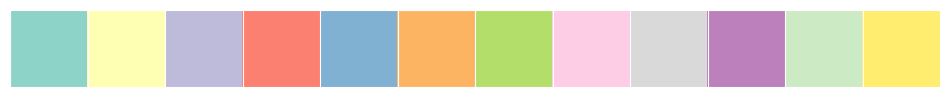

In [251]:
sns.palplot(sns.color_palette('Set3'))
plt.show()

html codes from [ColorBrewer](https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12);

In [252]:
raptor_colours = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

Types of raptor we used in `wrangling.ipynb`

In [253]:
raptor_types = ["Eagle", "Hawk", "Falcon", "Buzzard", "Harrier", "Kite", "Owl", "Osprey", "Vulture", "Condor", "Kestrel", "Caracara"]
# We organise alphabetically
raptor_types = sorted(raptor_types)
print(f"We have {len(raptor_types)} 'types': {raptor_types}")

We have 12 'types': ['Buzzard', 'Caracara', 'Condor', 'Eagle', 'Falcon', 'Harrier', 'Hawk', 'Kestrel', 'Kite', 'Osprey', 'Owl', 'Vulture']


We now create a raptor colour dictionary

In [254]:
raptor_colour = {}
for raptor in raptor_types:
    for colour in raptor_colours:
        raptor_colour[raptor] = colour
        raptor_colours.remove(colour)
        break
print(f"\nThe resulting dictionary is: \n{raptor_colour}")


The resulting dictionary is: 
{'Buzzard': '#8dd3c7', 'Caracara': '#ffffb3', 'Condor': '#bebada', 'Eagle': '#fb8072', 'Falcon': '#80b1d3', 'Harrier': '#fdb462', 'Hawk': '#b3de69', 'Kestrel': '#fccde5', 'Kite': '#d9d9d9', 'Osprey': '#bc80bd', 'Owl': '#ccebc5', 'Vulture': '#ffed6f'}


This dictionary can assign {key: value} pairs to the graphs and give a unique colour to each 'type' of `raptor`

We apply the unique colours by `raptor` using a lambda function and the `prey_colour` dictionary

In [255]:
# We use the below lambda functions to assign the colours

colour = pro_raptors['raptor'].apply(lambda x: raptor_colour[x])
colour2 = non_pro_raptors['raptor'].apply(lambda x: raptor_colour[x])

----

### Define a DataFrame `pro_raptor` of protected raptor species.
we can can by `state` $\in$ `states_list_short`.

In [256]:
# We use 'states_list_short' = ['AZ', 'CA', 'CO', 'UT'] for Arizona, California, Colorado & Utah

pro_raptor = {}
for state in states_list:
    pro_raptor[state] = pd.DataFrame(pro_raptors[pro_raptors['state'] == state])

print("Protected Raptor DataFrames by State:")

for i in range(0, len(states_list_short)):
    print(f"\n{states_list_short[i]}:\nShape: {pro_raptor[states_list_short[i]].shape}")
    categorical_cols = pro_raptor[states_list_short[i]].select_dtypes(include=['object']).columns
    print(f"Summary statistics:\n{pro_raptor[states_list_short[i]][categorical_cols].describe().transpose()}")

Protected Raptor DataFrames by State:

AZ:
Shape: (43, 19)
Summary statistics:
                    count unique                 top freq
park_code              43      3                GRCA   17
family                 43      5        Accipitridae   18
scientific_name        43     19  Accipiter cooperii    3
common_names           43     20       Cooper's Hawk    3
conservation_status    43      4  Species of Concern   38
raptor                 43      9              Falcon   10
park_name              43      3        Grand Canyon   17
state                  43      1                  AZ   43

CA:
Shape: (129, 19)
Summary statistics:
                    count unique                 top freq
park_code             129      8                DEVA   18
family                129      5        Accipitridae   65
scientific_name       129     23  Accipiter cooperii    8
common_names          129     23       Cooper's Hawk    8
conservation_status   129      5  Species of Concern  111
raptor   

We can call a DataFrame for each state as
- *pro_raptor['statecode']*

----
### Define a DataFrame `non_pro_raptor` of non-protected raptor species.
we can call df by `state` $\in$ `states_list_short`

In [257]:
# We use 'states_list_short' = ['AZ', 'CA', 'CO', 'UT'] for Arizona, California, Colorado & Utah

non_pro_raptor = {}
for state in states_list:
    non_pro_raptor[state] = pd.DataFrame(non_pro_raptors[non_pro_raptors['state'] == state])

print("Non-protected Raptor DataFrames by State:")

for i in range(0, len(states_list_short)):
    print(f"\n{states_list_short[i]}:\nShape: {non_pro_raptor[states_list_short[i]].shape}")
    categorical_cols = non_pro_raptor[states_list_short[i]].select_dtypes(include=['object']).columns
    print(f"Summary statistics:\n{non_pro_raptor[states_list_short[i]][categorical_cols].describe().transpose()}")

Non-protected Raptor DataFrames by State:

AZ:
Shape: (46, 19)
Summary statistics:
                    count unique                 top freq
park_code              46      3                SAGU   21
family                 46      5           Strigidae   20
scientific_name        46     22  Accipiter gentilis    3
common_names           46     22    Northern Goshawk    3
conservation_status    46      1       Least Concern   46
raptor                 46      5                 Owl   22
park_name              46      3             Saguaro   21
state                  46      1                  AZ   46

CA:
Shape: (113, 19)
Summary statistics:
                    count unique               top freq
park_code             113      8              DEVA   21
family                113      5         Strigidae   54
scientific_name       113     30  Falco sparverius    8
common_names          113     29  American Kestrel    8
conservation_status   113      1     Least Concern  113
raptor           

We can call a DataFrame for each state as
- *non_pro_raptor['statecode']*

----

## Protected Raptors

Create boolean dummy columns for each type $\in$ `raptor`

In [258]:
raptor_dummies = pd.get_dummies(pro_raptors['raptor']).astype(bool)
    #.rename(columns=lambda x: x.lower())
pro_raptors = pd.concat([pro_raptors, raptor_dummies], axis=1)
pro_raptors.head()

,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,...,Buzzard,Condor,Eagle,Falcon,Harrier,Hawk,Kite,Osprey,Owl,Vulture
0,GRCA,Accipitridae,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,...,False,False,False,False,False,True,False,False,False,False
2,GRCA,Accipitridae,Accipiter striatus,Sharp Shinned Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,...,False,False,False,False,False,True,False,False,False,False
3,GRCA,Accipitridae,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle,Grand Canyon,AZ,36.06,...,False,False,True,False,False,False,False,False,False,False
6,GRCA,Accipitridae,Buteo lagopus,Rough Legged Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,...,False,False,False,False,False,True,False,False,False,False
7,GRCA,Accipitridae,Buteo lineatus,Red Shouldered Hawk,Species of Concern,True,Hawk,Grand Canyon,AZ,36.06,...,False,False,False,False,False,True,False,False,False,False


Search `non_pro_raptors` for entries $\in$ `raptor_types` list

In [259]:
print(raptor_types)

['Buzzard', 'Caracara', 'Condor', 'Eagle', 'Falcon', 'Harrier', 'Hawk', 'Kestrel', 'Kite', 'Osprey', 'Owl', 'Vulture']


In [260]:
raptor_types_two = set()
# set is similar to a list but doesn't allow duplicates

for index, row in pro_raptors.iterrows():
    if row['raptor'] in raptor_types:
        raptor_types_two.add(row['raptor'])

raptor_types_two = list(raptor_types_two)
raptor_types_two.sort() # Conversion to sorted list
print(raptor_types_two)

['Buzzard', 'Condor', 'Eagle', 'Falcon', 'Harrier', 'Hawk', 'Kite', 'Osprey', 'Owl', 'Vulture']


In [261]:
# sum bools over park and state
pro_raptor_counts = pro_raptors.groupby(['state', 'park_name'])\
                                     [raptor_types_two].sum()\
                                    .reset_index()
pro_raptor_counts.head()

,state,park_name,Buzzard,Condor,Eagle,Falcon,Harrier,Hawk,Kite,Osprey,Owl,Vulture
0,AZ,Grand Canyon,0,1,2,4,1,4,0,1,3,1
1,AZ,Petrified Forest,1,0,2,3,1,2,0,1,2,1
2,AZ,Saguaro,0,0,1,3,1,3,0,1,3,1
3,CA,Channel Islands,0,0,2,3,1,3,1,1,2,0
4,CA,Death Valley,0,1,2,3,1,5,1,1,3,1


----
### Visualisation

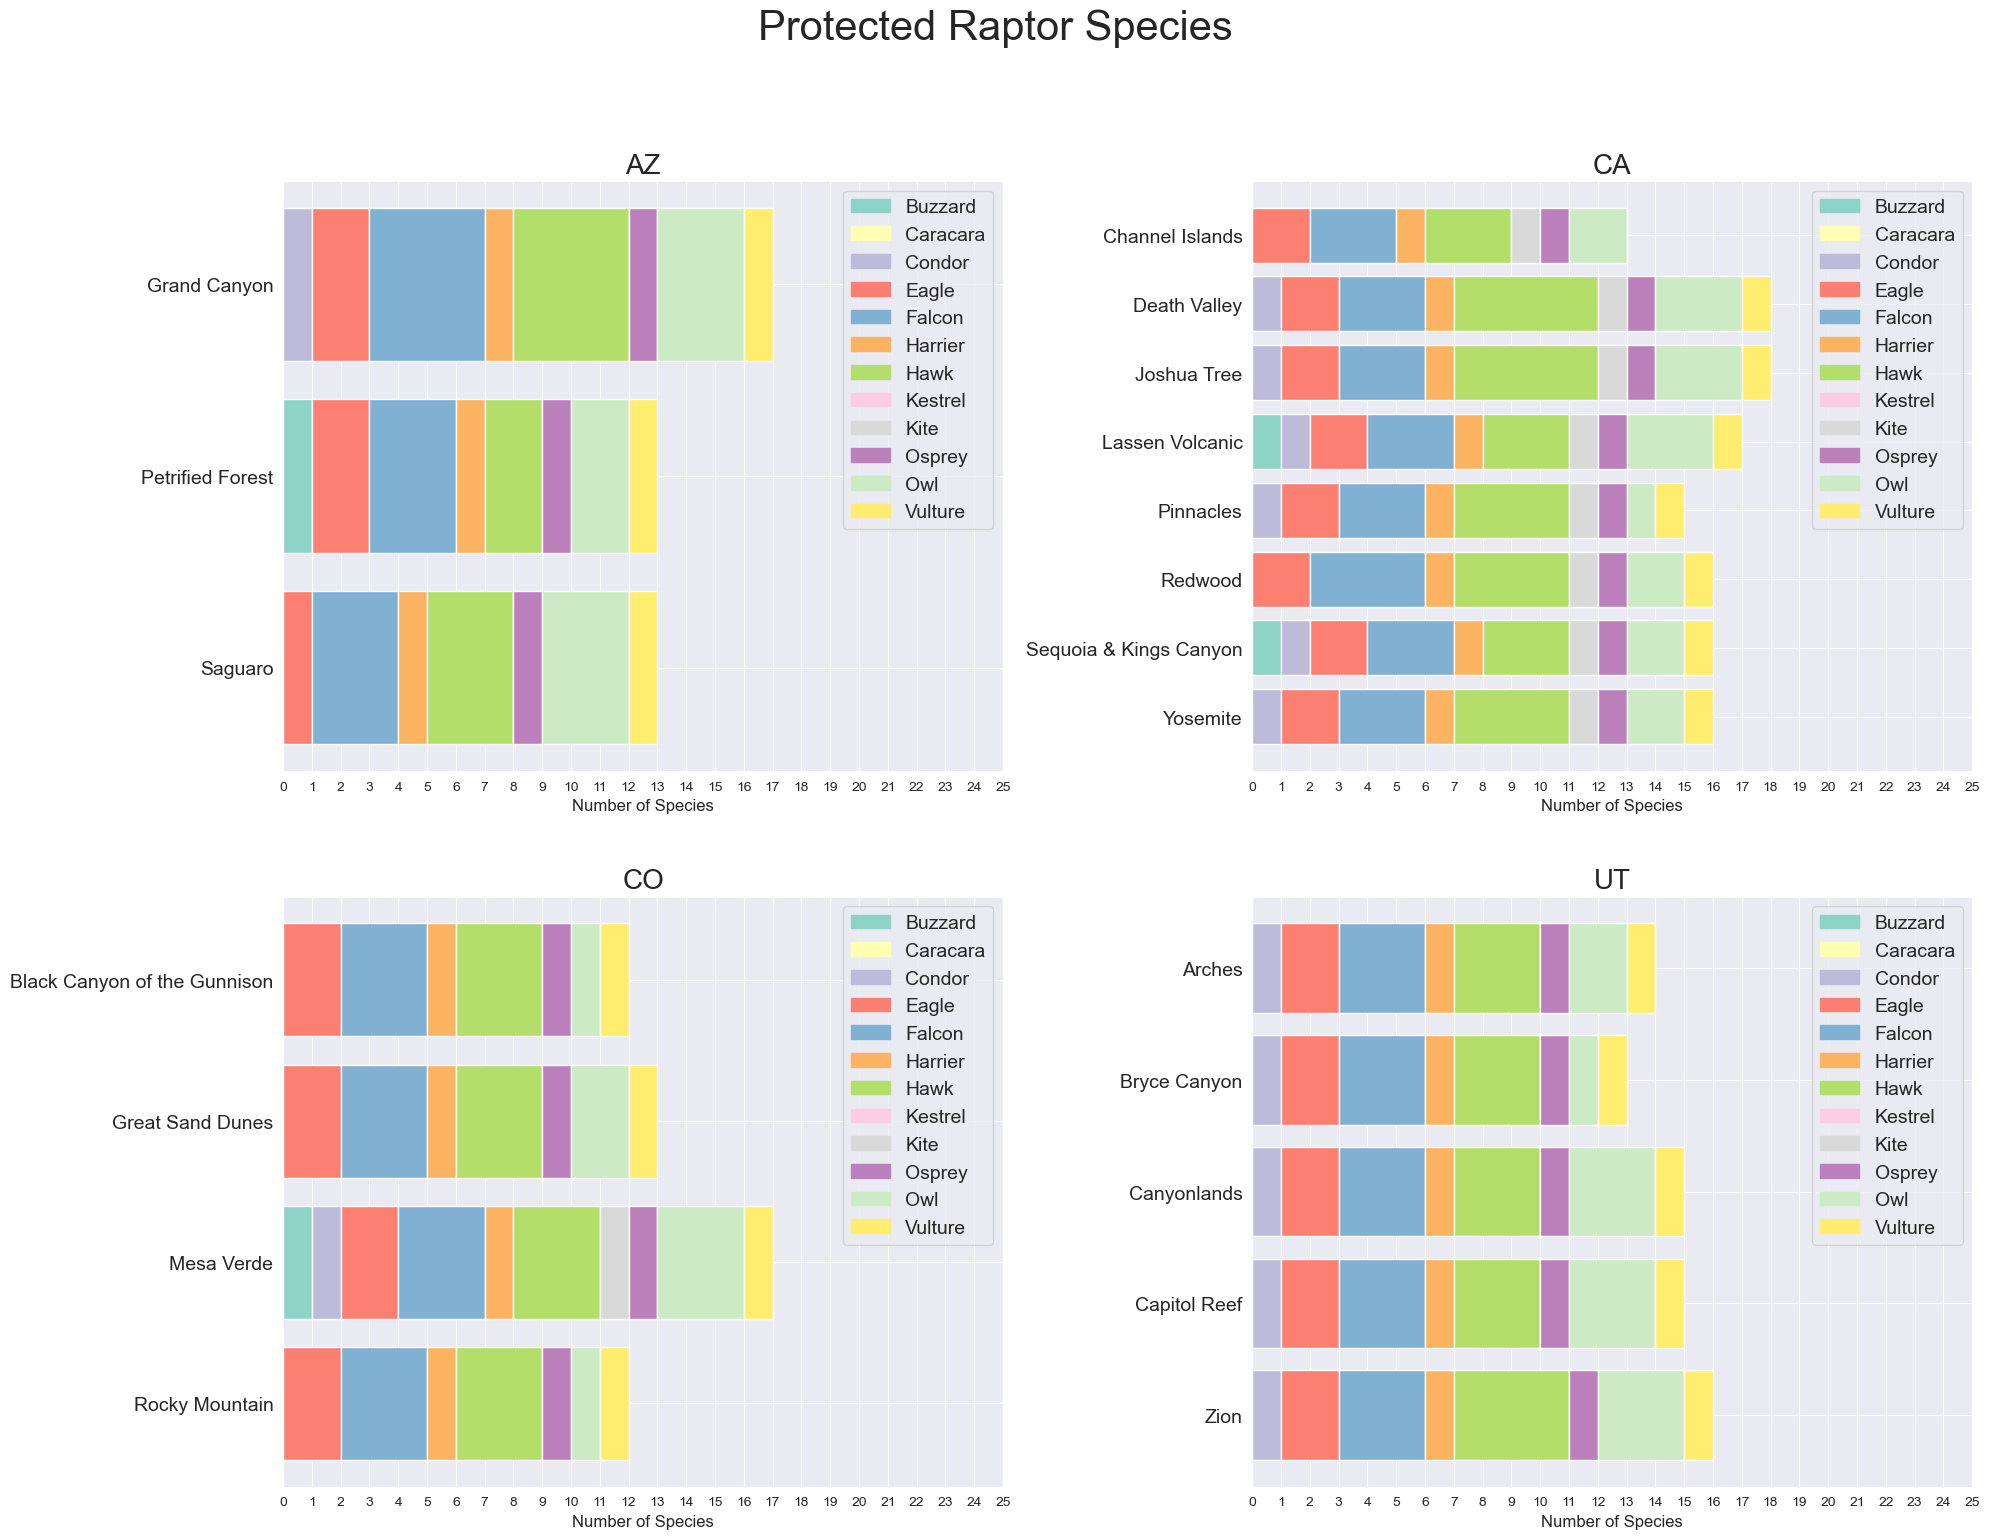

In [197]:
# legend colours
handles_4 = [mpatches.Patch(color=colour, label=label) for label, colour in raptor_colour.items()]

plt.figure(figsize=(20,15))
plt.suptitle('Protected Raptor Species', fontsize=30, y=1.05)
for i, state in enumerate(states_list_short):
    for j, raptor in enumerate(raptor_types_two):
        data = pd.DataFrame(pro_raptor_counts[pro_raptor_counts['state'] == state])
        data = data.sort_values(by='park_name', ascending=False)
        plt.subplot(2,2,(i+1))
        plt.title(state, fontsize=20)
        plt.barh(y=data.park_name, width=data[raptor], color=raptor_colour[raptor],
                 left=data.loc[:, raptor_types_two[:j]].sum(axis=1))
        #plt.yticks(data.park_name, rotation=0, fontsize=14)
        plt.yticks(np.arange(len(data)), data.park_name, rotation=0, fontsize=14)
        plt.xticks(np.arange(0,26,1))
        plt.xlabel('Number of Species', fontsize=12)
        plt.legend(handles=handles_4, fontsize=14)
        plt.gca().invert_yaxis()
        plt.grid(True)

plt.subplots_adjust(top=0.5)
plt.tight_layout()
plt.show()

There appears to be large variety to the types of `raptor` with a protected `conservation_status`

----
### Raptor `common_names` for each 'type'

In [198]:
for state in states_list:
    df = pro_raptor[state]
    common_names_unique = df.groupby('raptor')['common_names'].unique().reset_index()

    print(f"\n{state}:\n")
    for row in common_names_unique.to_dict('records'):
        print(f"{row['raptor']}; {row['common_names']}\n")



AZ:

Buzzard; ['Rough Legged Buzzard']

Condor; ['California Condor']

Eagle; ['Golden Eagle' 'Bald Eagle']

Falcon; ['Merlin' 'Prairie Falcon' 'Peregrine Falcon' 'American Peregrine Falcon']

Harrier; ['Northern Harrier']

Hawk; ["Cooper's Hawk" 'Sharp Shinned Hawk' 'Rough Legged Hawk'
 'Red Shouldered Hawk' "Harris' Hawk"]

Osprey; ['Osprey']

Owl; ['Short Eared Owl' 'Long Eared Owl' 'Mexican Spotted Owl' 'Elf Owl']

Vulture; ['Turkey Vulture']


CA:

Buzzard; ['Rough Legged Buzzard']

Condor; ['California Condor']

Eagle; ['Golden Eagle' 'Bald Eagle']

Falcon; ['Merlin' 'Prairie Falcon' 'Peregrine Falcon' 'American Peregrine Falcon'
 'Arctic Peregrine Falcon']

Harrier; ['Northern Harrier']

Hawk; ["Cooper's Hawk" 'Sharp Shinned Hawk' 'Rough Legged Hawk'
 'Red Shouldered Hawk' "Harris's Hawk"]

Kite; ['White Tailed Kite']

Osprey; ['Osprey']

Owl; ['Short Eared Owl' 'Long Eared Owl' 'Northern Spotted Owl' 'Elf Owl'
 'California Spotted Owl']

Vulture; ['Turkey Vulture']


CO:

Buzz

----
## `Endangered`, `In Recovery` & `Threatened` conservation statues over all SW states

In [199]:
for state in states_list:
    df = pro_raptor[state]
    # dictionary of raptor species
    species_data = {
        "Endangered": [],
        "In Recovery": [],
        "Threatened": []
    }
    # dictionary of park names
    parks_data = {
        "Endangered": [],
        "In Recovery": [],
        "Threatened": []
    }

    for index, row in df.iterrows():
        conservation_status = row['conservation_status']
        if conservation_status in species_data:
            species_data[conservation_status].append(row['common_names'])
            parks_data[conservation_status].append(row['park_name'])

    print(f"\n{state}:")
    for status, species in species_data.items():
        species = list(set(species))
        parks = list(set(parks_data[status]))
        print(f"\n{len(species)} {status}: {species} \nIn National Parks: {parks}")



AZ:

1 Endangered: ['California Condor'] 
In National Parks: ['Grand Canyon']

2 In Recovery: ['Bald Eagle', 'American Peregrine Falcon'] 
In National Parks: ['Grand Canyon', 'Petrified Forest']

1 Threatened: ['Mexican Spotted Owl'] 
In National Parks: ['Grand Canyon']

CA:

1 Endangered: ['California Condor'] 
In National Parks: ['Death Valley', 'Yosemite', 'Joshua Tree', 'Pinnacles', 'Lassen Volcanic', 'Sequoia & Kings Canyon']

3 In Recovery: ['Bald Eagle', 'Arctic Peregrine Falcon', 'American Peregrine Falcon'] 
In National Parks: ['Sequoia & Kings Canyon', 'Death Valley', 'Yosemite', 'Channel Islands', 'Joshua Tree', 'Pinnacles', 'Redwood', 'Lassen Volcanic']

1 Threatened: ['Northern Spotted Owl'] 
In National Parks: ['Death Valley']

CO:

1 Endangered: ['California Condor'] 
In National Parks: ['Mesa Verde']

1 In Recovery: ['Bald Eagle'] 
In National Parks: ['Great Sand Dunes', 'Rocky Mountain', 'Black Canyon of the Gunnison', 'Mesa Verde']

1 Threatened: ['Mexican Spotted Ow

----
### California Condor

The only endangered raptor species in the dataset, present in AZ, CA, CO, NV & UT

<img height="437.5" src="Images/condors.jpg" width="1400"/>

Condors raised in captivity are often tagged when released into the wild. [Pixabay](https://pixabay.com/images/search/california%20condor/)

The California Condor is critically endangered and during the 1980's the population dwindled to just a few dozen birds.
This was mainly due to;

- Destruction of the birds' native habitat, including old-growth forests and roosting sites.
- Lead poisoning from hunting activities.
- The widespread use of the pesticide [DDT](https://www.cdc.gov/biomonitoring/DDT_FactSheet.html) which causes eggshell thinning.
- Human activities such as direct killing and power line collisions

Conservation efforts, including captive breeding and release programs, have helped increase the population. However, the species is still at risk and considered one of the most endangered bird species in the world.

Below is a visualisation of Condor numbers in captivity and in the wild between 2000 and 2016. The data is from the [National Parks Service](https://www.nps.gov/subjects/condors/understandingcondors.htm)

In [200]:
condors = pd.read_csv('csv_files/condors.csv')
condors.head()

,year,wild,captive
0,2000,50,128
1,2001,58,129
2,2002,81,130
3,2003,84,131
4,2004,96,132


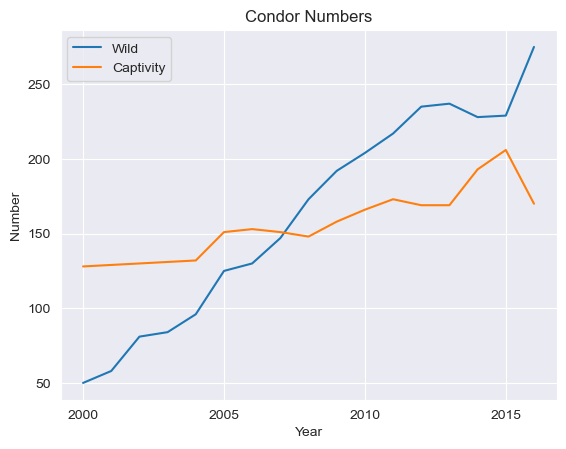

<Figure size 640x480 with 0 Axes>

In [201]:
# Plot the data as lines
plt.plot('year', 'wild', data=condors, label='Wild')
plt.plot('year', 'captive', data=condors, label='Captivity')
plt.xlabel('Year')
plt.xticks(range(2000, 2020, 5), range(2000, 2020, 5))
plt.ylabel('Number')
plt.title('Condor Numbers')
plt.legend()
plt.show()
plt.clf()

----

### Bald Eagle

`In Recovery` (formerly endangered) in all seven SW states

<img height="437.5" src="Images/bald_eagle.jpg" width="1400"/>

Blurb about bald eagles [NPS](https://www.nps.gov/places/000/bald-eagle.htm)

----
&nbsp;
## Non-Protected Raptors

Create boolean dummy columns for each type $\in$ `raptor`

In [202]:
raptor_dummies_two = pd.get_dummies(non_pro_raptors['raptor']).astype(bool)
    #.rename(columns=lambda x: x.lower())
non_pro_raptors = pd.concat([non_pro_raptors, raptor_dummies_two], axis=1)
non_pro_raptors.head()

,park_code,family,scientific_name,common_names,conservation_status,protected,raptor,park_name,state,latitude,...,threatened,under_review,is_raptor,Caracara,Falcon,Hawk,Kestrel,Kite,Owl,Vulture
1,GRCA,Accipitridae,Accipiter gentilis,Northern Goshawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,...,False,False,True,False,False,True,False,False,False,False
4,GRCA,Accipitridae,Buteo albonotatus,Zone Tailed Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,...,False,False,True,False,False,True,False,False,False,False
5,GRCA,Accipitridae,Buteo jamaicensis,Red Tailed Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,...,False,False,True,False,False,True,False,False,False,False
8,GRCA,Accipitridae,Buteo platypterus,Broad Winged Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,...,False,False,True,False,False,True,False,False,False,False
9,GRCA,Accipitridae,Buteo regalis,Ferruginous Hawk,Least Concern,False,Hawk,Grand Canyon,AZ,36.06,...,False,False,True,False,False,True,False,False,False,False


Search `non_pro_raptors` for entries $\in$ `raptor_types` list

In [204]:
print(raptor_types)

['Buzzard', 'Caracara', 'Condor', 'Eagle', 'Falcon', 'Harrier', 'Hawk', 'Kestrel', 'Kite', 'Osprey', 'Owl', 'Vulture']


In [205]:
raptor_types_three = set()
# set is similar to a list but doesn't allow duplicates

for index, row in non_pro_raptors.iterrows():
    if row['raptor'] in raptor_types:
        raptor_types_three.add(row['raptor'])

raptor_types_three = list(raptor_types_three)
raptor_types_three.sort() # Conversion to sorted list
raptor_types_three

['Caracara', 'Falcon', 'Hawk', 'Kestrel', 'Kite', 'Owl', 'Vulture']

In [206]:
# sum bools over park and state
non_pro_raptor_counts = non_pro_raptors.groupby(['state', 'park_name'])\
                                     [raptor_types_three].sum()\
                                    .reset_index()
non_pro_raptor_counts.head()

,state,park_name,Caracara,Falcon,Hawk,Kestrel,Kite,Owl,Vulture
0,AZ,Grand Canyon,0,0,7,1,0,8,0
1,AZ,Petrified Forest,0,0,5,1,0,3,0
2,AZ,Saguaro,1,0,7,1,0,11,1
3,CA,Channel Islands,0,0,3,1,0,5,0
4,CA,Death Valley,0,1,6,1,1,11,1


----
### Visualisation

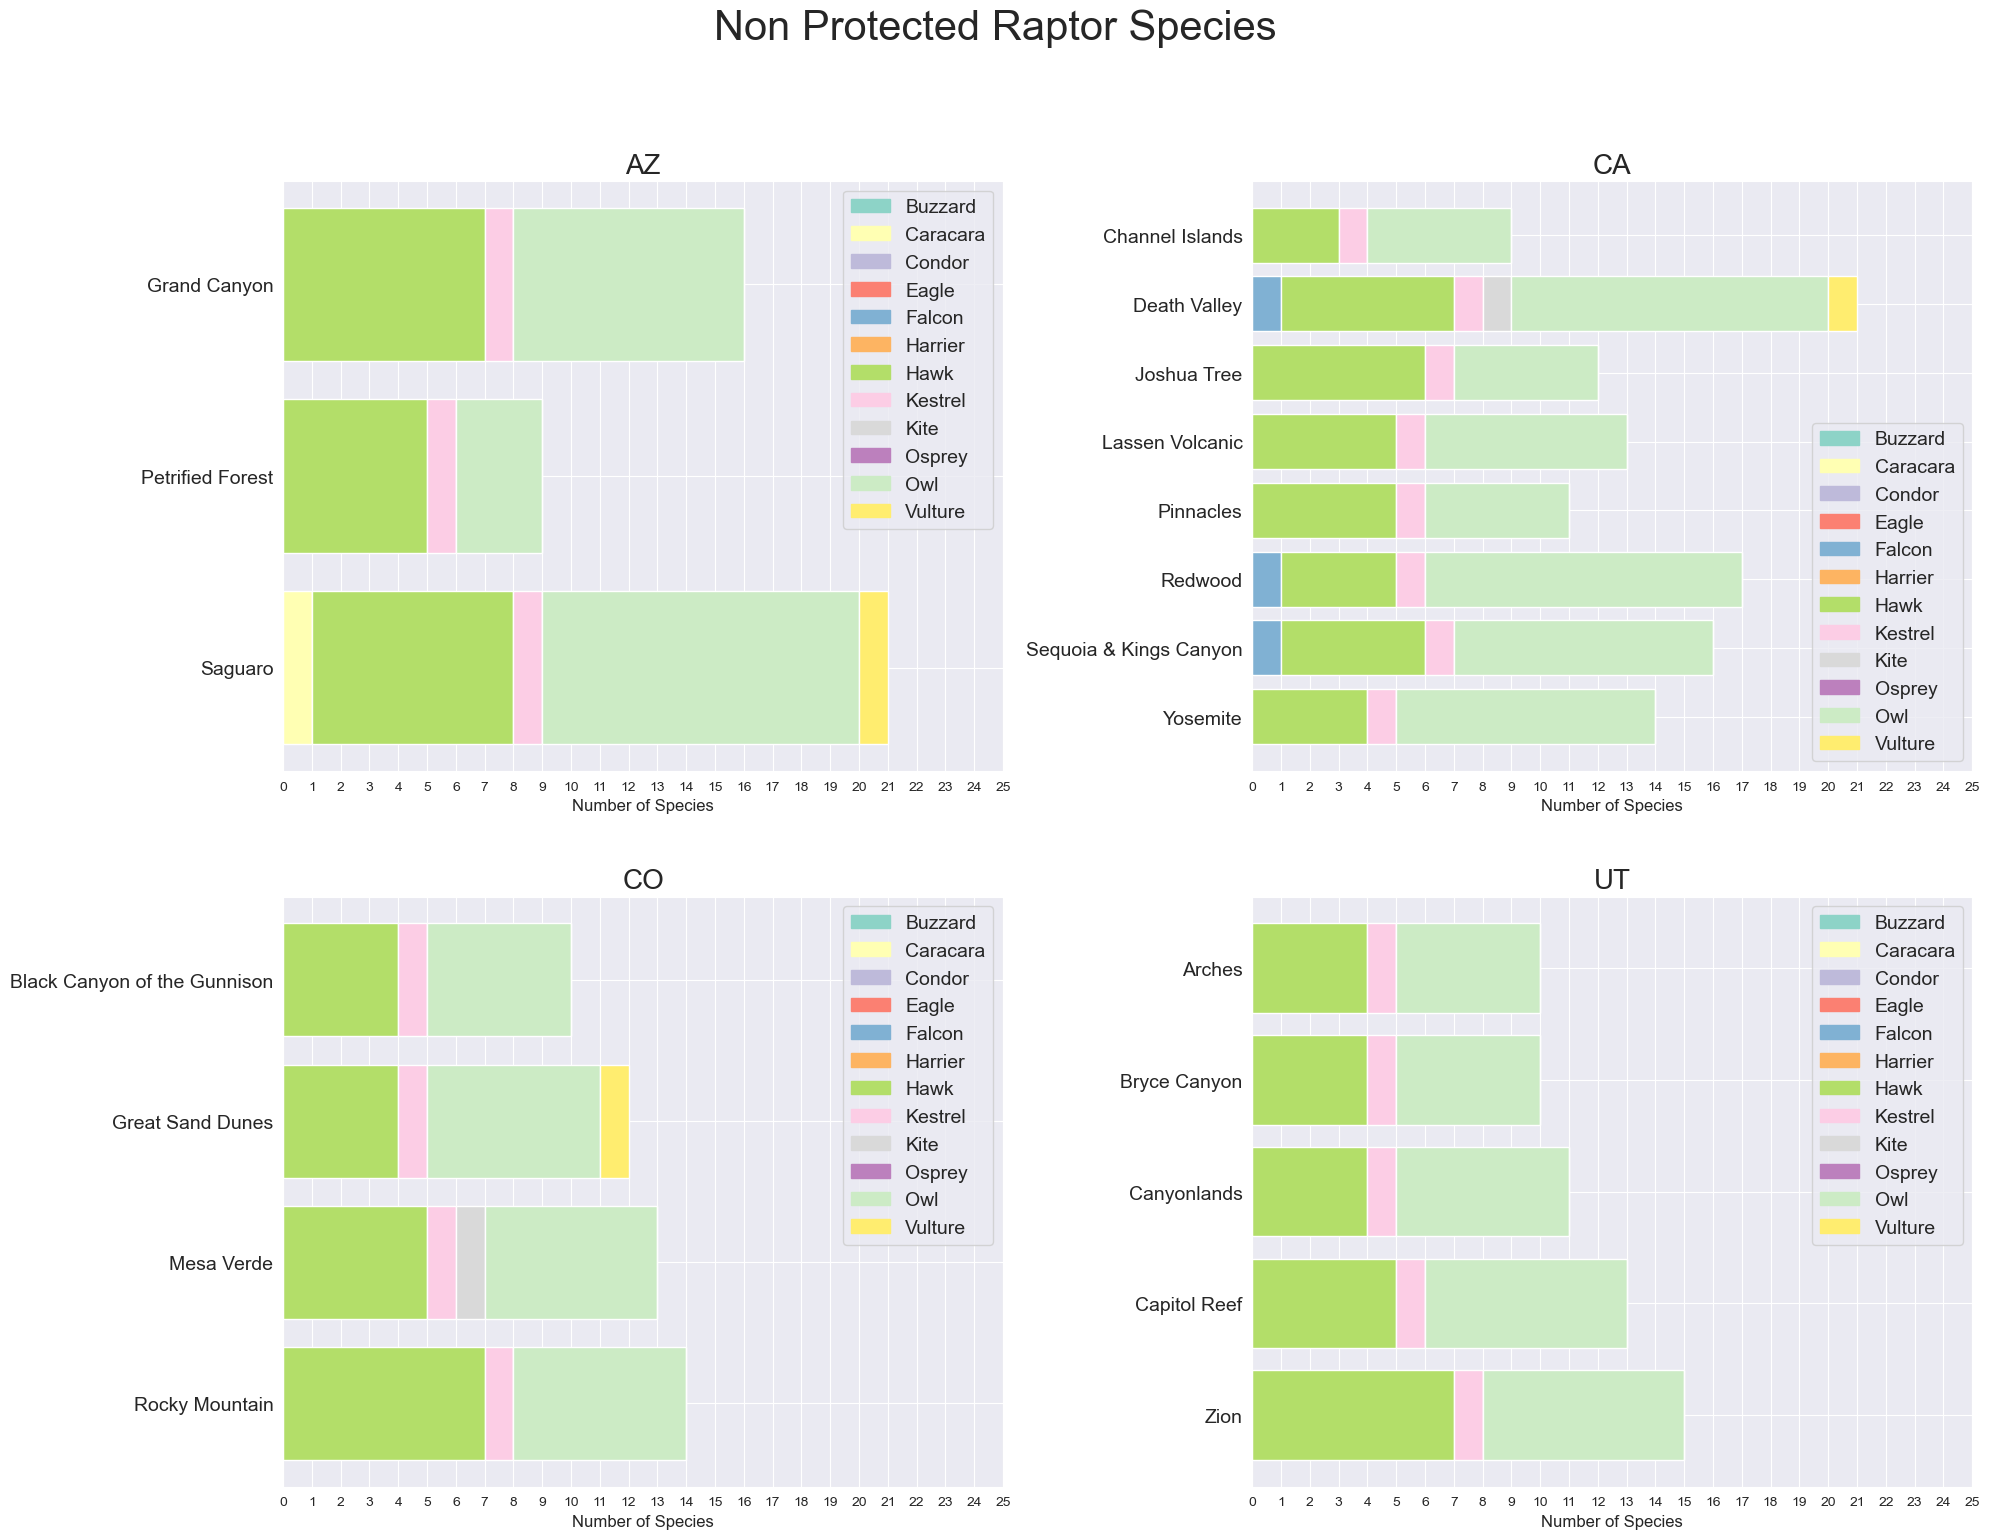

In [122]:
plt.figure(figsize=(20,15))
plt.suptitle('Non Protected Raptor Species', fontsize=30, y=1.05)
for i, state in enumerate(states_list_short):
    for j, raptor in enumerate(raptor_types_three):
        data = pd.DataFrame(non_pro_raptor_counts[non_pro_raptor_counts['state'] == state])
        plt.subplot(2,2,(i+1))
        plt.title(state, fontsize=20)
        plt.barh(y=data.park_name, width=data[raptor], color=raptor_colour[raptor],
                 left=data.loc[:, raptor_types_three[:j]].sum(axis=1))
        plt.yticks(np.arange(len(data)), data.park_name, rotation=0, fontsize=14)
        plt.xticks(np.arange(0,26,1))
        plt.xlabel('Number of Species', fontsize=12)
        plt.legend(handles=handles_4, fontsize=14)
        plt.gca().invert_yaxis()
        plt.grid(True)

plt.subplots_adjust(top=0.5)
plt.tight_layout()
plt.show()

----
### Raptor `common_names` for each type

In [70]:
for state in states_list:
    df = non_pro_raptor[state]
    common_names_unique = df.groupby('raptor')['common_names'].unique().reset_index()

    print(f"\n{state}:\n")
    for row in common_names_unique.to_dict('records'):
        print(f"{row['raptor']}; {row['common_names']}\n")


AZ:

Caracara; ['Northern Crested Caracara']

Hawk; ['Northern Goshawk' 'Zone Tailed Hawk' 'Red Tailed Hawk'
 'Broad Winged Hawk' 'Ferruginous Hawk' "Swainson's Hawk"
 'Common Black Hawk' 'Grey Hawk']

Kestrel; ['American Kestrel']

Owl; ['Northern Saw Whet Owl' 'Burrowing Owl' 'Great Horned Owl'
 'Northern Pygmy Owl' 'Western Screech Owl' 'Flammulated Owl'
 'Spotted Owl' 'Barn Owl' 'Ferruginous Pygmy Owl' 'Eastern Screech Owl'
 'Whiskered Screech Owl']

Vulture; ['Black Vulture']


CA:

Falcon; ['Gyrfalcon' 'Peregrine Falcon']

Hawk; ['Northern Goshawk' 'Red Tailed Hawk' "Swainson's Hawk" 'Bird Hawks'
 'Zone Tailed Hawk' 'Broad Winged Hawk' 'Ferruginous Hawk' 'Gray Hawk'
 'Buteonine Hawks']

Kestrel; ['American Kestrel']

Kite; ['Mississippi Kite']

Owl; ['Northern Saw Whet Owl' 'Burrowing Owl' 'Great Horned Owl'
 'Flammulated Owl' 'Barn Owl' 'Snowy Owl' 'Saw Whet Owl'
 'Northern Pygmy Owl' 'Eastern Screech Owl' 'Western Screech Owl'
 'American Barn Owl' 'Great Grey Owl' 'Great Gray 

----
### Owls appear to be the largest aggregate `raptor` with `conservation_status` $=$ 'Least Concern'
Exploring owl species by `park_name`

In [262]:
for state in states_list:
    df = non_pro_raptor[state]
    # dictionary with park names as keys and owl species as values
    owl_species_by_park = {}

    for index, row in df.iterrows():
        if row['raptor'] == 'Owl':
            park = row['park_name']
            species = row['common_names']
            if park not in owl_species_by_park:
                owl_species_by_park[park] = []
            owl_species_by_park[park].append(species)

    print(f"\n\n{state}:")
    for park, species in owl_species_by_park.items():
        print(f"\nPark: {park} \n{len(species)} Owl species: \n{species}")




AZ:

Park: Grand Canyon 
8 Owl species: 
['Northern Saw Whet Owl', 'Burrowing Owl', 'Great Horned Owl', 'Northern Pygmy Owl', 'Western Screech Owl', 'Flammulated Owl', 'Spotted Owl', 'Barn Owl']

Park: Petrified Forest 
3 Owl species: 
['Burrowing Owl', 'Great Horned Owl', 'Western Screech Owl']

Park: Saguaro 
11 Owl species: 
['Northern Saw Whet Owl', 'Burrowing Owl', 'Great Horned Owl', 'Ferruginous Pygmy Owl', 'Northern Pygmy Owl', 'Eastern Screech Owl', 'Western Screech Owl', 'Whiskered Screech Owl', 'Flammulated Owl', 'Spotted Owl', 'Barn Owl']


CA:

Park: Channel Islands 
5 Owl species: 
['Northern Saw Whet Owl', 'Burrowing Owl', 'Great Horned Owl', 'Flammulated Owl', 'Barn Owl']

Park: Death Valley 
11 Owl species: 
['Flammulated Owl', 'Northern Saw Whet Owl', 'Burrowing Owl', 'Snowy Owl', 'Great Horned Owl', 'Saw Whet Owl', 'Northern Pygmy Owl', 'Eastern Screech Owl', 'Western Screech Owl', 'American Barn Owl', 'Barn Owl']

Park: Joshua Tree 
5 Owl species: 
['Northern Saw 

----

## Statistics